## DATASETS - Inpatient

In [1]:
import pandas as pd
import numpy as np

# Read Dataset from csv file
df = pd.read_csv("Inpatient_2019-2022_NEW1.csv")
df.head(2)

Corporate          ClaimNo       Date  \
0  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP09190002  26/6/2019   
1  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP10190003  30/6/2019   

  DischargeDate  MCDays  AmountIncurred  AmountInsured  ExcessPaid     Status  \
0     28/6/2019     2.0          6626.9         5000.0      1626.9  PROCESSED   
1      1/7/2019     1.0          3641.0         3641.0         0.0  PROCESSED   

  TypeOfClaims  ...  PatientGender  \
0      GHSReim  ...              F   
1      GHSReim  ...              F   

                                    MedicalProviders            Diagnosis  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL  Outcome of delivery   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...  Outcome of delivery   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   

                   IndustryField  
0  Manufacturing Factory/Company  
1  Manufacturing Factory/Company  

[2 rows x 31 columns]

In [2]:
print(df.columns)

Index(['Corporate', 'ClaimNo', 'Date', 'DischargeDate', 'MCDays',
       'AmountIncurred', 'AmountInsured', 'ExcessPaid', 'Status',
       'TypeOfClaims', 'TotalVisit', 'IsSurgical', 'IsLTM', 'IsMultipleDiag',
       'BenefitPlan', 'EmployeeID', 'PatientID', 'Relationship', 'PatientDOB',
       'PatientAge', 'AgeBand', 'PatientGender', 'MedicalProviders',
       'Diagnosis', 'DiagnosisGroup', 'HospCharges', 'Doctor', 'ICDCode',
       'ProviderState', 'IsPanel', 'IndustryField'],
      dtype='object')


## DATA TRANSFORMATION

### Encode Column (Anonymisation)

Encode column for `Corporate` to ensure protection of data privacy and confidential.

In [3]:
# (Data Transformation - Encode Column)
%pip install sklearn-pandas
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

encoders = [(["Corporate"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["Corporate"]), label_col], axis="columns")
df.head(3)

Note: you may need to restart the kernel to use updated packages.


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ClaimNo       Date DischargeDate  MCDays  AmountIncurred  \
0  HESSCIP09190002  26/6/2019     28/6/2019     2.0          6626.9   
1  HESSCIP10190003  30/6/2019      1/7/2019     1.0          3641.0   
2  HESSCIP10190004  26/6/2019     28/6/2019     2.0           949.0   

   AmountInsured  ExcessPaid     Status TypeOfClaims  TotalVisit  ...  \
0         5000.0      1626.9  PROCESSED      GHSReim           1  ...   
1         3641.0         0.0  PROCESSED      GHSReim           1  ...   
2          949.0         0.0  PROCESSED      GHSReim           1  ...   

                                    MedicalProviders  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...   
2                  ANDORRA WOMEN & CHILDREN HOSPITAL   

                                           Diagnosis  \
0                                Outcome of delivery   
1                                Outcome of delivery   
2  Other specified conditions of integument speci...   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   
2  Certain conditions originating in the perinata...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   
2  KHAMSIAH BINTI MUDA   P83.8      SELANGOR       0   

                   IndustryField Corporate  
0  Manufacturing Factory/Company      2240  
1  Manufacturing Factory/Company      2240  
2  Manufacturing Factory/Company      2240  

[3 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814818 entries, 0 to 814817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ClaimNo           814818 non-null  object 
 1   Date              814818 non-null  object 
 2   DischargeDate     811953 non-null  object 
 3   MCDays            803659 non-null  float64
 4   AmountIncurred    814818 non-null  float64
 5   AmountInsured     814818 non-null  float64
 6   ExcessPaid        814818 non-null  float64
 7   Status            814818 non-null  object 
 8   TypeOfClaims      814818 non-null  object 
 9   TotalVisit        814818 non-null  int64  
 10  IsSurgical        814818 non-null  object 
 11  IsLTM             814818 non-null  int64  
 12  IsMultipleDiag    814818 non-null  int64  
 13  BenefitPlan       814740 non-null  object 
 14  EmployeeID        814818 non-null  object 
 15  PatientID         814818 non-null  object 
 16  Relationship      81

### Drop Data

In [5]:
# Drop insignificant Variable: ClaimNo
df1 = df.drop(labels=['Date','BenefitPlan','EmployeeID','PatientID','PatientDOB','Diagnosis','ICDCode','Doctor','Status'], axis=1)

### Shape of the Dataset
# Before Drop Variable
print('Before Data Cleaning - Number of rows: '+ format(df.shape[0]) +', number of attributes: '+ format(df.shape[1]))

# After Data Variable
print('After Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of attributes: '+ format(df1.shape[1]))

Before Data Cleaning - Number of rows: 814818, number of attributes: 31
After Data Cleaning - Number of rows: 814818, number of attributes: 22


- ICDC Code and Diagnosis
    - Replicated information compare to diagnosis group, thus decided to remove these two variables 

### Change Data Types

In [6]:
print(df1.dtypes)

ClaimNo              object
DischargeDate        object
MCDays              float64
AmountIncurred      float64
AmountInsured       float64
ExcessPaid          float64
TypeOfClaims         object
TotalVisit            int64
IsSurgical           object
IsLTM                 int64
IsMultipleDiag        int64
Relationship         object
PatientAge            int64
AgeBand              object
PatientGender        object
MedicalProviders     object
DiagnosisGroup       object
HospCharges          object
ProviderState        object
IsPanel               int64
IndustryField        object
Corporate             int32
dtype: object


In [7]:
df1['DischargeDate'] = pd.to_datetime(df1['DischargeDate'])
df1['Corporate'] = df1['Corporate'].astype(str)

print(df1.dtypes)

C:\Users\User\AppData\Local\Temp\ipykernel_20188\1175950134.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['DischargeDate'] = pd.to_datetime(df1['DischargeDate'])


ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
dtype: object


## DATA CLEANING

### CHECK DUPLICATE DATA

Based on results below show that there have no duplicated data inside the dataset.

In [10]:
df1.duplicated().sum()

0

### CHECK NULL VALUES

Total NULL Values for Each Variable:
Baased on the results below show that total 7 out 31 variables having null values. Variables that contain NULL values are DischargeDate, BenefitPlan, MCDays, PatientDOB, PatientGender, ICDCode, ProviderState.

In [11]:
## Count of Null Value
#df1.isnull().sum()
## df1.isna().sum() ##produce same output

#Percentage of Null Values
(df1.isnull().sum()/len(df))*100

ClaimNo             0.000000
DischargeDate       0.351612
MCDays              1.369508
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
Relationship        0.000000
PatientAge          0.000000
AgeBand             0.000000
PatientGender       0.131440
MedicalProviders    0.008714
DiagnosisGroup      0.000000
HospCharges         0.000000
ProviderState       0.000000
IsPanel             0.000000
IndustryField       0.000000
Corporate           0.000000
dtype: float64

In [12]:
# Impute MCDays feature by its mean in our dataset
x = df1['MCDays'].mean()
df1['MCDays'].fillna(x, inplace = True)
df1.MCDays.isnull().sum()

0

The remaining missing values is less than 5% can be ignore. In this case, we will drop the missing values for the remaining NAN rows in the data sets.

In [13]:
# Drop NA values in df1
df2 = df1.dropna()
df2.shape

(810811, 22)

In [14]:
### Shape of the Dataset

# Before Data Cleaning
print('Before Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of features: '+ format(df1.shape[1]))

# After Data Cleaning
print('After Data Cleaning - Number of rows: '+ format(df2.shape[0]) +', number of features: '+ format(df2.shape[1]))

print ( 'Percentage of Data Removing :' + "{:.2%}".format(((df2.shape[0]-df1.shape[0])/df1.shape[0])))

Before Data Cleaning - Number of rows: 814818, number of features: 22
After Data Cleaning - Number of rows: 810811, number of features: 22
Percentage of Data Removing :-0.49%


In [15]:
### Percentage of missing data 

# Before Data Cleaning
Missing_Percentage1 = (df1.isnull().sum()).sum()/np.product(df1.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage1,5)) + " %")

# After Data Cleaning
Missing_Percentage = (df2.isnull().sum()).sum()/np.product(df2.shape)*100
print("The number of missing entries after cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.02235 %
The number of missing entries after cleaning: 0.0 %


In [16]:
df2 = df2.loc[(df2['DischargeDate'] >= '2019-01-01')]
df2.shape

(810234, 22)

### Data Labelling

In [17]:
import datetime
df2['Year'] = pd.DatetimeIndex(df2['DischargeDate']).year
df2 = df2.astype({"Year":'int'}) 

ClaimNo DischargeDate  MCDays  AmountIncurred  AmountInsured  \
0  HESSCIP09190002    2019-06-28     2.0          6626.9         5000.0   
1  HESSCIP10190003    2019-01-07     1.0          3641.0         3641.0   
2  HESSCIP10190004    2019-06-28     2.0           949.0          949.0   

   ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  IsLTM  ...   AgeBand  \
0      1626.9      GHSReim           1  Non-Surgical      0  ...  30 to 39   
1         0.0      GHSReim           1  Non-Surgical      0  ...  40 to 49   
2         0.0      GHSReim           1  Non-Surgical      0  ...   0 to 12   

  PatientGender                                   MedicalProviders  \
0             F                  ANDORRA WOMEN & CHILDREN HOSPITAL   
1             F  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...   
2             F                  ANDORRA WOMEN & CHILDREN HOSPITAL   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   
2  Certain conditions originating in the perinata...        HIGH   

  ProviderState IsPanel                  IndustryField Corporate  Year  
0      SELANGOR       0  Manufacturing Factory/Company      2240  2019  
1  KUALA LUMPUR       0  Manufacturing Factory/Company      2240  2019  
2      SELANGOR       0  Manufacturing Factory/Company      2240  2019  

[3 rows x 23 columns]

In [19]:
## Value Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(ascending=False),'\n')
        

-------- ClaimNo --------
G1066878CIP11220001    2
HESSCIP09190002        1
TFTACIP04210005        1
TFTACIP02210004        1
TFTACIP03210001        1
                      ..
ALLBANKCIP11200053     1
ALLBANKCIP11200054     1
ALLBANKCIP11200055     1
ALLBANKCIP11200056     1
UNTNCIP12220008        1
Name: ClaimNo, Length: 810233, dtype: int64 

-------- TypeOfClaims --------
GHSPost        367739
GHS            317484
GHSReim         94687
GHSPostReim     30324
Name: TypeOfClaims, dtype: int64 

-------- IsSurgical --------
Non-Surgical    448711
Surgical        311426
DayCare          50097
Name: IsSurgical, dtype: int64 

-------- Relationship --------
Employee    595014
Child       119423
Spouse       95785
Parent          12
Name: Relationship, dtype: int64 

-------- AgeBand --------
40 to 49    206241
30 to 39    177788
50 to 59    173492
0 to 12      88552
20 to 29     73038
60 ≤         66638
13 to 19     24485
Name: AgeBand, dtype: int64 

-------- PatientGender --------
M    

In [20]:
# Percentage Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(normalize=True, ascending=False),'\n')


-------- ClaimNo --------
G1066878CIP11220001    0.000002
HESSCIP09190002        0.000001
TFTACIP04210005        0.000001
TFTACIP02210004        0.000001
TFTACIP03210001        0.000001
                         ...   
ALLBANKCIP11200053     0.000001
ALLBANKCIP11200054     0.000001
ALLBANKCIP11200055     0.000001
ALLBANKCIP11200056     0.000001
UNTNCIP12220008        0.000001
Name: ClaimNo, Length: 810233, dtype: float64 

-------- TypeOfClaims --------
GHSPost        0.453868
GHS            0.391842
GHSReim        0.116864
GHSPostReim    0.037426
Name: TypeOfClaims, dtype: float64 

-------- IsSurgical --------
Non-Surgical    0.553804
Surgical        0.384366
DayCare         0.061830
Name: IsSurgical, dtype: float64 

-------- Relationship --------
Employee    0.734373
Child       0.147393
Spouse      0.118219
Parent      0.000015
Name: Relationship, dtype: float64 

-------- AgeBand --------
40 to 49    0.254545
30 to 39    0.219428
50 to 59    0.214126
0 to 12     0.109292
20 to 29 

In [22]:
### PatientGender

# Before Labelling
print(df2['PatientGender'].value_counts())

PatientGender_mapping = {'F':'0','': '0','M':'1','m':'1'}
df2 = df2.assign(PatientGender = df2.PatientGender.map(PatientGender_mapping))

# After Labelling
print(df2['PatientGender'].value_counts())

M    428955
F    380944
        331
m         4
Name: PatientGender, dtype: int64
1    428959
0    380944
Name: PatientGender, dtype: int64


In [23]:
# Data Labelling for Data Type as "Object"
col_name = df2.select_dtypes("object")
for col_name in df2.columns:
    if(df2[col_name].dtype == 'object'):
        df2[col_name]= df2[col_name].astype('category')
        df2['c_'+ col_name] = df2[col_name].cat.codes
df2.head()

ClaimNo DischargeDate  MCDays  AmountIncurred  AmountInsured  \
0      HESSCIP09190002    2019-06-28     2.0         6626.90        5000.00   
1      HESSCIP10190003    2019-01-07     1.0         3641.00        3641.00   
2      HESSCIP10190004    2019-06-28     2.0          949.00         949.00   
3          CIP03190003    2019-09-02     3.0          719.95         719.95   
4  60023249CIP02190001    2019-03-02     3.0        14186.90       13941.90   

   ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  IsLTM  ...  \
0      1626.9      GHSReim           1  Non-Surgical      0  ...   
1         0.0      GHSReim           1  Non-Surgical      0  ...   
2         0.0      GHSReim           1  Non-Surgical      0  ...   
3         0.0      GHSReim           1  Non-Surgical      0  ...   
4       245.0          GHS           1      Surgical      0  ...   

   c_IsSurgical c_Relationship  c_AgeBand c_PatientGender c_MedicalProviders  \
0             1              3          3               0                 16   
1             1              1          4               0                889   
2             1              0          0               0                 16   
3             1              1          3               1                142   
4             2              1          5               0                728   

  c_DiagnosisGroup c_HospCharges c_ProviderState c_IndustryField  c_Corporate  
0               82             1              41             101         1378  
1               82             1               3             101         1378  
2                0             1              41             101         1378  
3               92             2              41              90         3113  
4               87             1              41              28         6590  

[5 rows x 35 columns]

## EXPLORATORY DATA ANALYSIS

In [24]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### DATA DESCRIPTION

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810234 entries, 0 to 814817
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ClaimNo             810234 non-null  category      
 1   DischargeDate       810234 non-null  datetime64[ns]
 2   MCDays              810234 non-null  float64       
 3   AmountIncurred      810234 non-null  float64       
 4   AmountInsured       810234 non-null  float64       
 5   ExcessPaid          810234 non-null  float64       
 6   TypeOfClaims        810234 non-null  category      
 7   TotalVisit          810234 non-null  int64         
 8   IsSurgical          810234 non-null  category      
 9   IsLTM               810234 non-null  int64         
 10  IsMultipleDiag      810234 non-null  int64         
 11  Relationship        810234 non-null  category      
 12  PatientAge          810234 non-null  int64         
 13  AgeBand             810234 no

In [26]:
df2.describe()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
count  810234.000000    8.102340e+05  810234.000000  8.102340e+05   
mean        2.539035    3.842659e+03    3622.696243  2.199631e+02   
std         8.037665    1.052369e+04    6931.787498  7.438088e+03   
min         0.000000    0.000000e+00       0.010000 -1.000000e+04   
25%         1.000000    1.890000e+02     184.000000  0.000000e+00   
50%         2.000000    5.433250e+02     518.000000  0.000000e+00   
75%         3.000000    4.830300e+03    4632.422500  5.489750e+01   
max      1211.000000    6.335290e+06  688245.450000  6.335175e+06   

          TotalVisit          IsLTM  IsMultipleDiag     PatientAge  \
count  810234.000000  810234.000000   810234.000000  810234.000000   
mean        0.507060       0.122257        0.000919      39.315263   
std         0.499953       0.327583        0.030309      16.450133   
min         0.000000       0.000000        0.000000       1.000000   
25%         0.000000       0.000000        0.000000      31.000000   
50%         1.000000       0.000000        0.000000      42.000000   
75%         1.000000       0.000000        0.000000      51.000000   
max         2.000000       1.000000        1.000000     123.000000   

             IsPanel           Year  ...   c_IsSurgical  c_Relationship  \
count  810234.000000  810234.000000  ...  810234.000000   810234.000000   
mean        0.845705    2020.447651  ...       1.322535        1.089059   
std         0.361231       1.140772  ...       0.584951        0.782530   
min         0.000000    2019.000000  ...       0.000000        0.000000   
25%         1.000000    2019.000000  ...       1.000000        1.000000   
50%         1.000000    2020.000000  ...       1.000000        1.000000   
75%         1.000000    2021.000000  ...       2.000000        1.000000   
max         1.000000    2022.000000  ...       2.000000        3.000000   

           c_AgeBand  c_PatientGender  c_MedicalProviders  c_DiagnosisGroup  \
count  810234.000000    810234.000000       810234.000000     810234.000000   
mean        3.451073         0.529018          703.193482         60.445769   
std         1.685955         0.499975          391.884076         24.728009   
min         0.000000        -1.000000            0.000000          0.000000   
25%         3.000000         0.000000          338.000000         42.000000   
50%         4.000000         1.000000          756.000000         61.000000   
75%         5.000000         1.000000          938.000000         84.000000   
max         6.000000         1.000000         1362.000000         92.000000   

       c_HospCharges  c_ProviderState  c_IndustryField    c_Corporate  
count  810234.000000    810234.000000    810234.000000  810234.000000  
mean        2.327982        24.487964        82.184947    3641.782652  
std         1.249072        17.888900        42.116912    1840.824943  
min         0.000000         0.000000         0.000000       0.000000  
25%         1.000000         3.000000        57.000000    1983.000000  
50%         3.000000        37.000000        78.000000    3886.000000  
75%         3.000000        41.000000       114.000000    5355.000000  
max         5.000000        43.000000       174.000000    6603.000000  

[8 rows x 22 columns]

In [27]:
df2.astype('category').describe()

ClaimNo        DischargeDate    MCDays  AmountIncurred  \
count                810234               810234  810234.0        810234.0   
unique               810233                 1441     294.0        262774.0   
top     G1066878CIP11220001  2022-06-24 00:00:00       0.0           500.0   
freq                      2                 1053  192412.0         15312.0   

        AmountInsured  ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  \
count        810234.0    810234.0       810234      810234        810234   
unique       278086.0     71976.0            4           3             3   
top             500.0         0.0      GHSPost           1  Non-Surgical   
freq          15407.0    517013.0       367739      410835        448711   

         IsLTM  ...  c_IsSurgical c_Relationship  c_AgeBand c_PatientGender  \
count   810234  ...        810234         810234     810234          810234   
unique       2  ...             3              4          7               3   
top          0  ...             1              1          4               1   
freq    711177  ...        448711         595014     206241          428959   

       c_MedicalProviders c_DiagnosisGroup c_HospCharges c_ProviderState  \
count              810234           810234        810234          810234   
unique               1363               93             6              44   
top                   916               61             3              41   
freq                60507           128220        335589          297117   

       c_IndustryField  c_Corporate  
count           810234       810234  
unique             175         6604  
top                 78         5504  
freq            109780        90726  

[4 rows x 35 columns]

In [28]:
df2.describe(include='all').T

count  unique  \
ClaimNo               810234  810233   
DischargeDate         810234    1441   
MCDays              810234.0     NaN   
AmountIncurred      810234.0     NaN   
AmountInsured       810234.0     NaN   
ExcessPaid          810234.0     NaN   
TypeOfClaims          810234       4   
TotalVisit          810234.0     NaN   
IsSurgical            810234       3   
IsLTM               810234.0     NaN   
IsMultipleDiag      810234.0     NaN   
Relationship          810234       4   
PatientAge          810234.0     NaN   
AgeBand               810234       7   
PatientGender         809903       2   
MedicalProviders      810234    1363   
DiagnosisGroup        810234      93   
HospCharges           810234       6   
ProviderState         810234      44   
IsPanel             810234.0     NaN   
IndustryField         810234     175   
Corporate             810234    6604   
Year                810234.0     NaN   
c_ClaimNo           810234.0     NaN   
c_TypeOfClaims      810234.0     NaN   
c_IsSurgical        810234.0     NaN   
c_Relationship      810234.0     NaN   
c_AgeBand           810234.0     NaN   
c_PatientGender     810234.0     NaN   
c_MedicalProviders  810234.0     NaN   
c_DiagnosisGroup    810234.0     NaN   
c_HospCharges       810234.0     NaN   
c_ProviderState     810234.0     NaN   
c_IndustryField     810234.0     NaN   
c_Corporate         810234.0     NaN   

                                                                  top    freq  \
ClaimNo                                           G1066878CIP11220001       2   
DischargeDate                                     2022-06-24 00:00:00    1053   
MCDays                                                            NaN     NaN   
AmountIncurred                                                    NaN     NaN   
AmountInsured                                                     NaN     NaN   
ExcessPaid                                                        NaN     NaN   
TypeOfClaims                                                  GHSPost  367739   
TotalVisit                                                        NaN     NaN   
IsSurgical                                               Non-Surgical  448711   
IsLTM                                                             NaN     NaN   
IsMultipleDiag                                                    NaN     NaN   
Relationship                                                 Employee  595014   
PatientAge                                                        NaN     NaN   
AgeBand                                                      40 to 49  206241   
PatientGender                                                       1  428959   
MedicalProviders                                               OTHERS   60507   
DiagnosisGroup      Diseases of the musculoskeletal system and con...  128220   
HospCharges                                                    MEDIUM  335589   
ProviderState                                                SELANGOR  297117   
IsPanel                                                           NaN     NaN   
IndustryField                                               Insurance  109780   
Corporate                                                        5965   90726   
Year                                                              NaN     NaN   
c_ClaimNo                                                         NaN     NaN   
c_TypeOfClaims                                                    NaN     NaN   
c_IsSurgical                                                      NaN     NaN   
c_Relationship                                                    NaN     NaN   
c_AgeBand                                                         NaN     NaN   
c_PatientGender                                                   NaN     NaN   
c_MedicalProviders                                                NaN     NaN   
c_DiagnosisGroup                                                  NaN  

## DATA VISUALIZATION

### Univariate Analysis

**1. `AmountInsured`**

<Axes: >

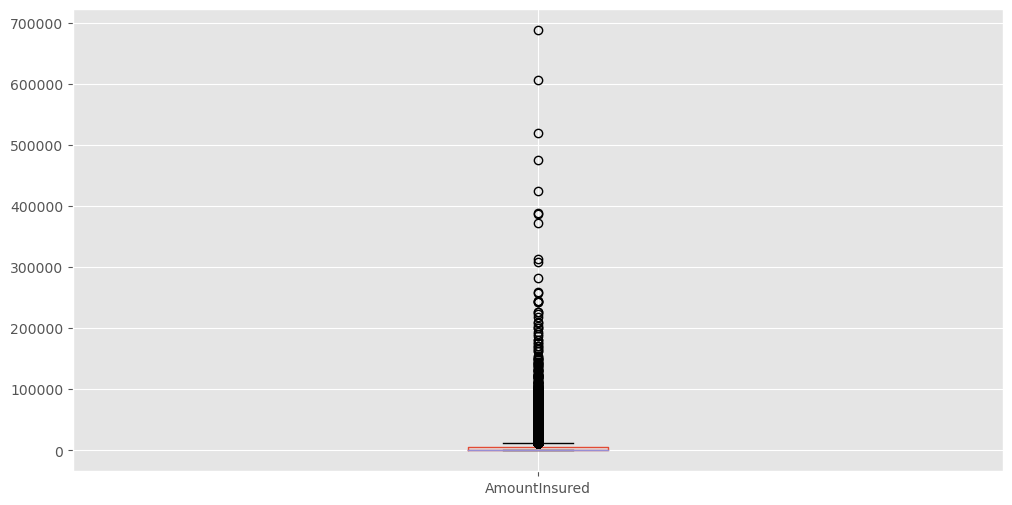

In [29]:
df2[['AmountInsured']].boxplot()

Text(0.5, 1.0, 'Distribution of Amount Insured')

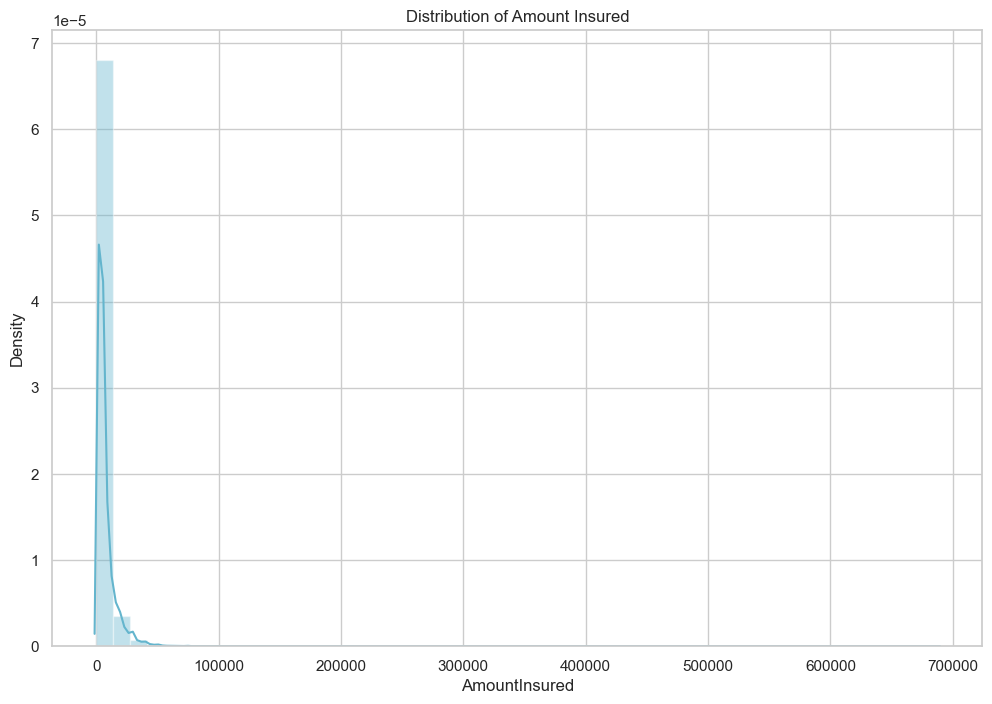

In [32]:
# Distribution of the Amount Insured
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df2['AmountInsured'], kde = True, color = 'c')
plt.title('Distribution of Amount Insured')

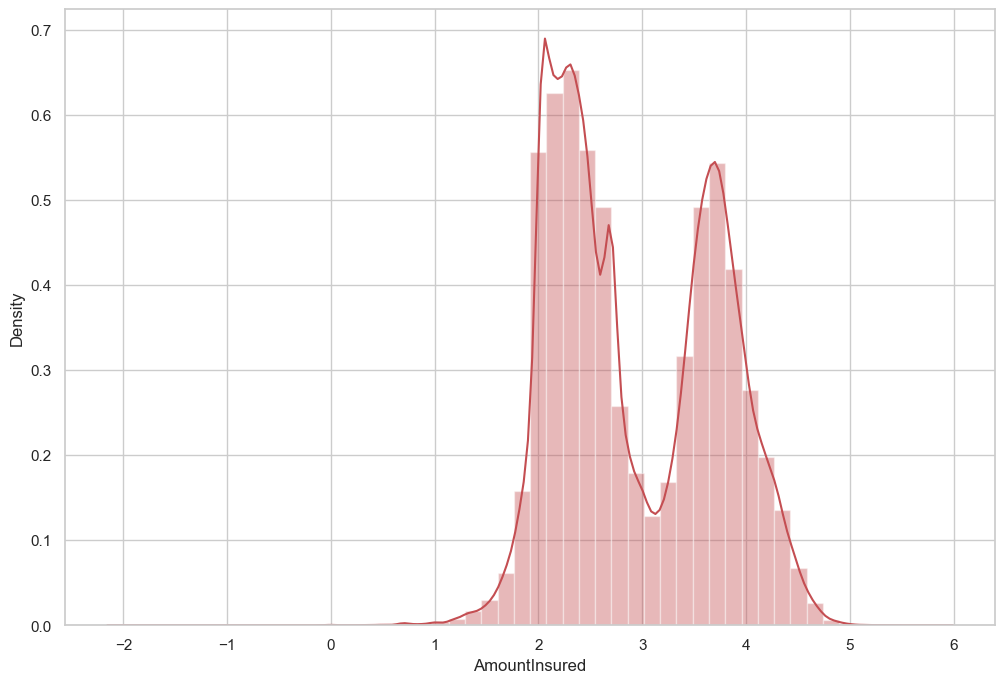

In [33]:
# This distribution is right-skewed. To make it closer to normal we can apply natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df2['AmountInsured']), kde = True, color = 'r' )

**2. `PatientAge`**

<Axes: >

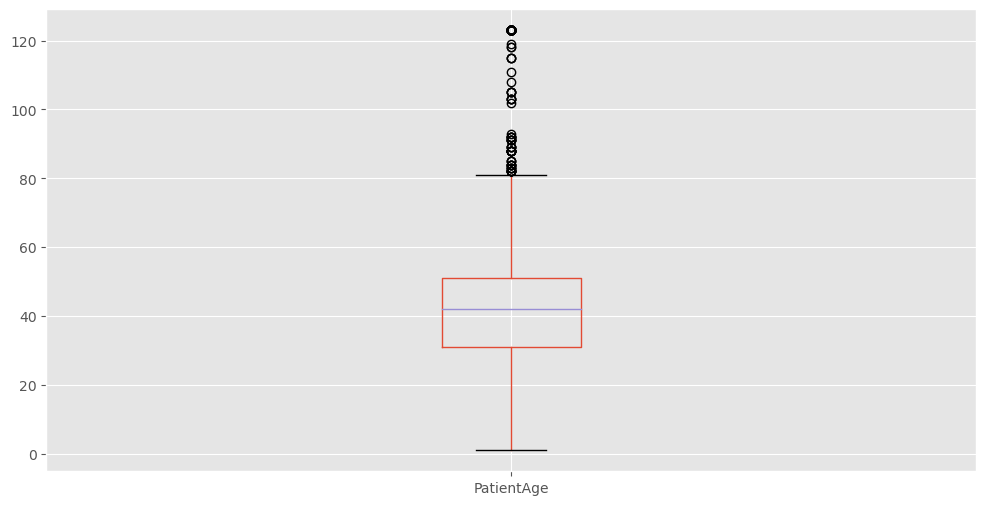

In [31]:
df2[['PatientAge']].boxplot()

<Axes: xlabel='PatientAge', ylabel='Count'>

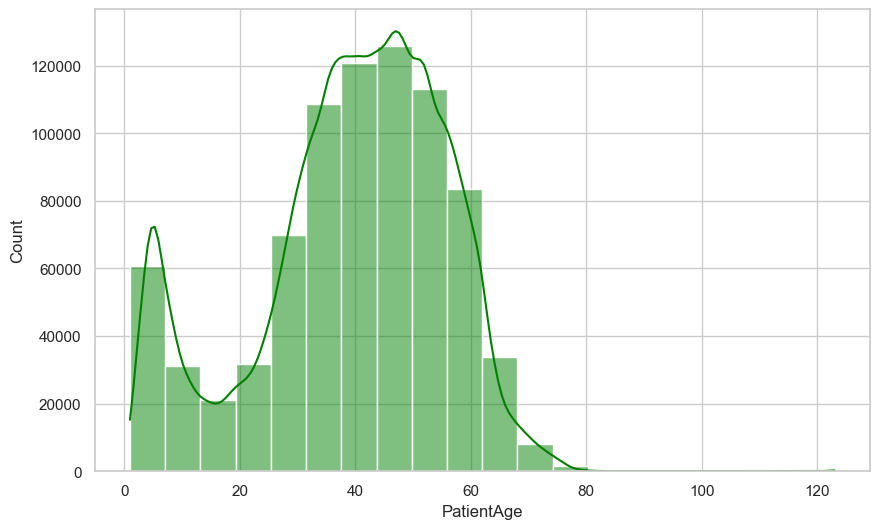

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(x='PatientAge', data=df2, bins=20, kde=True, color='green')

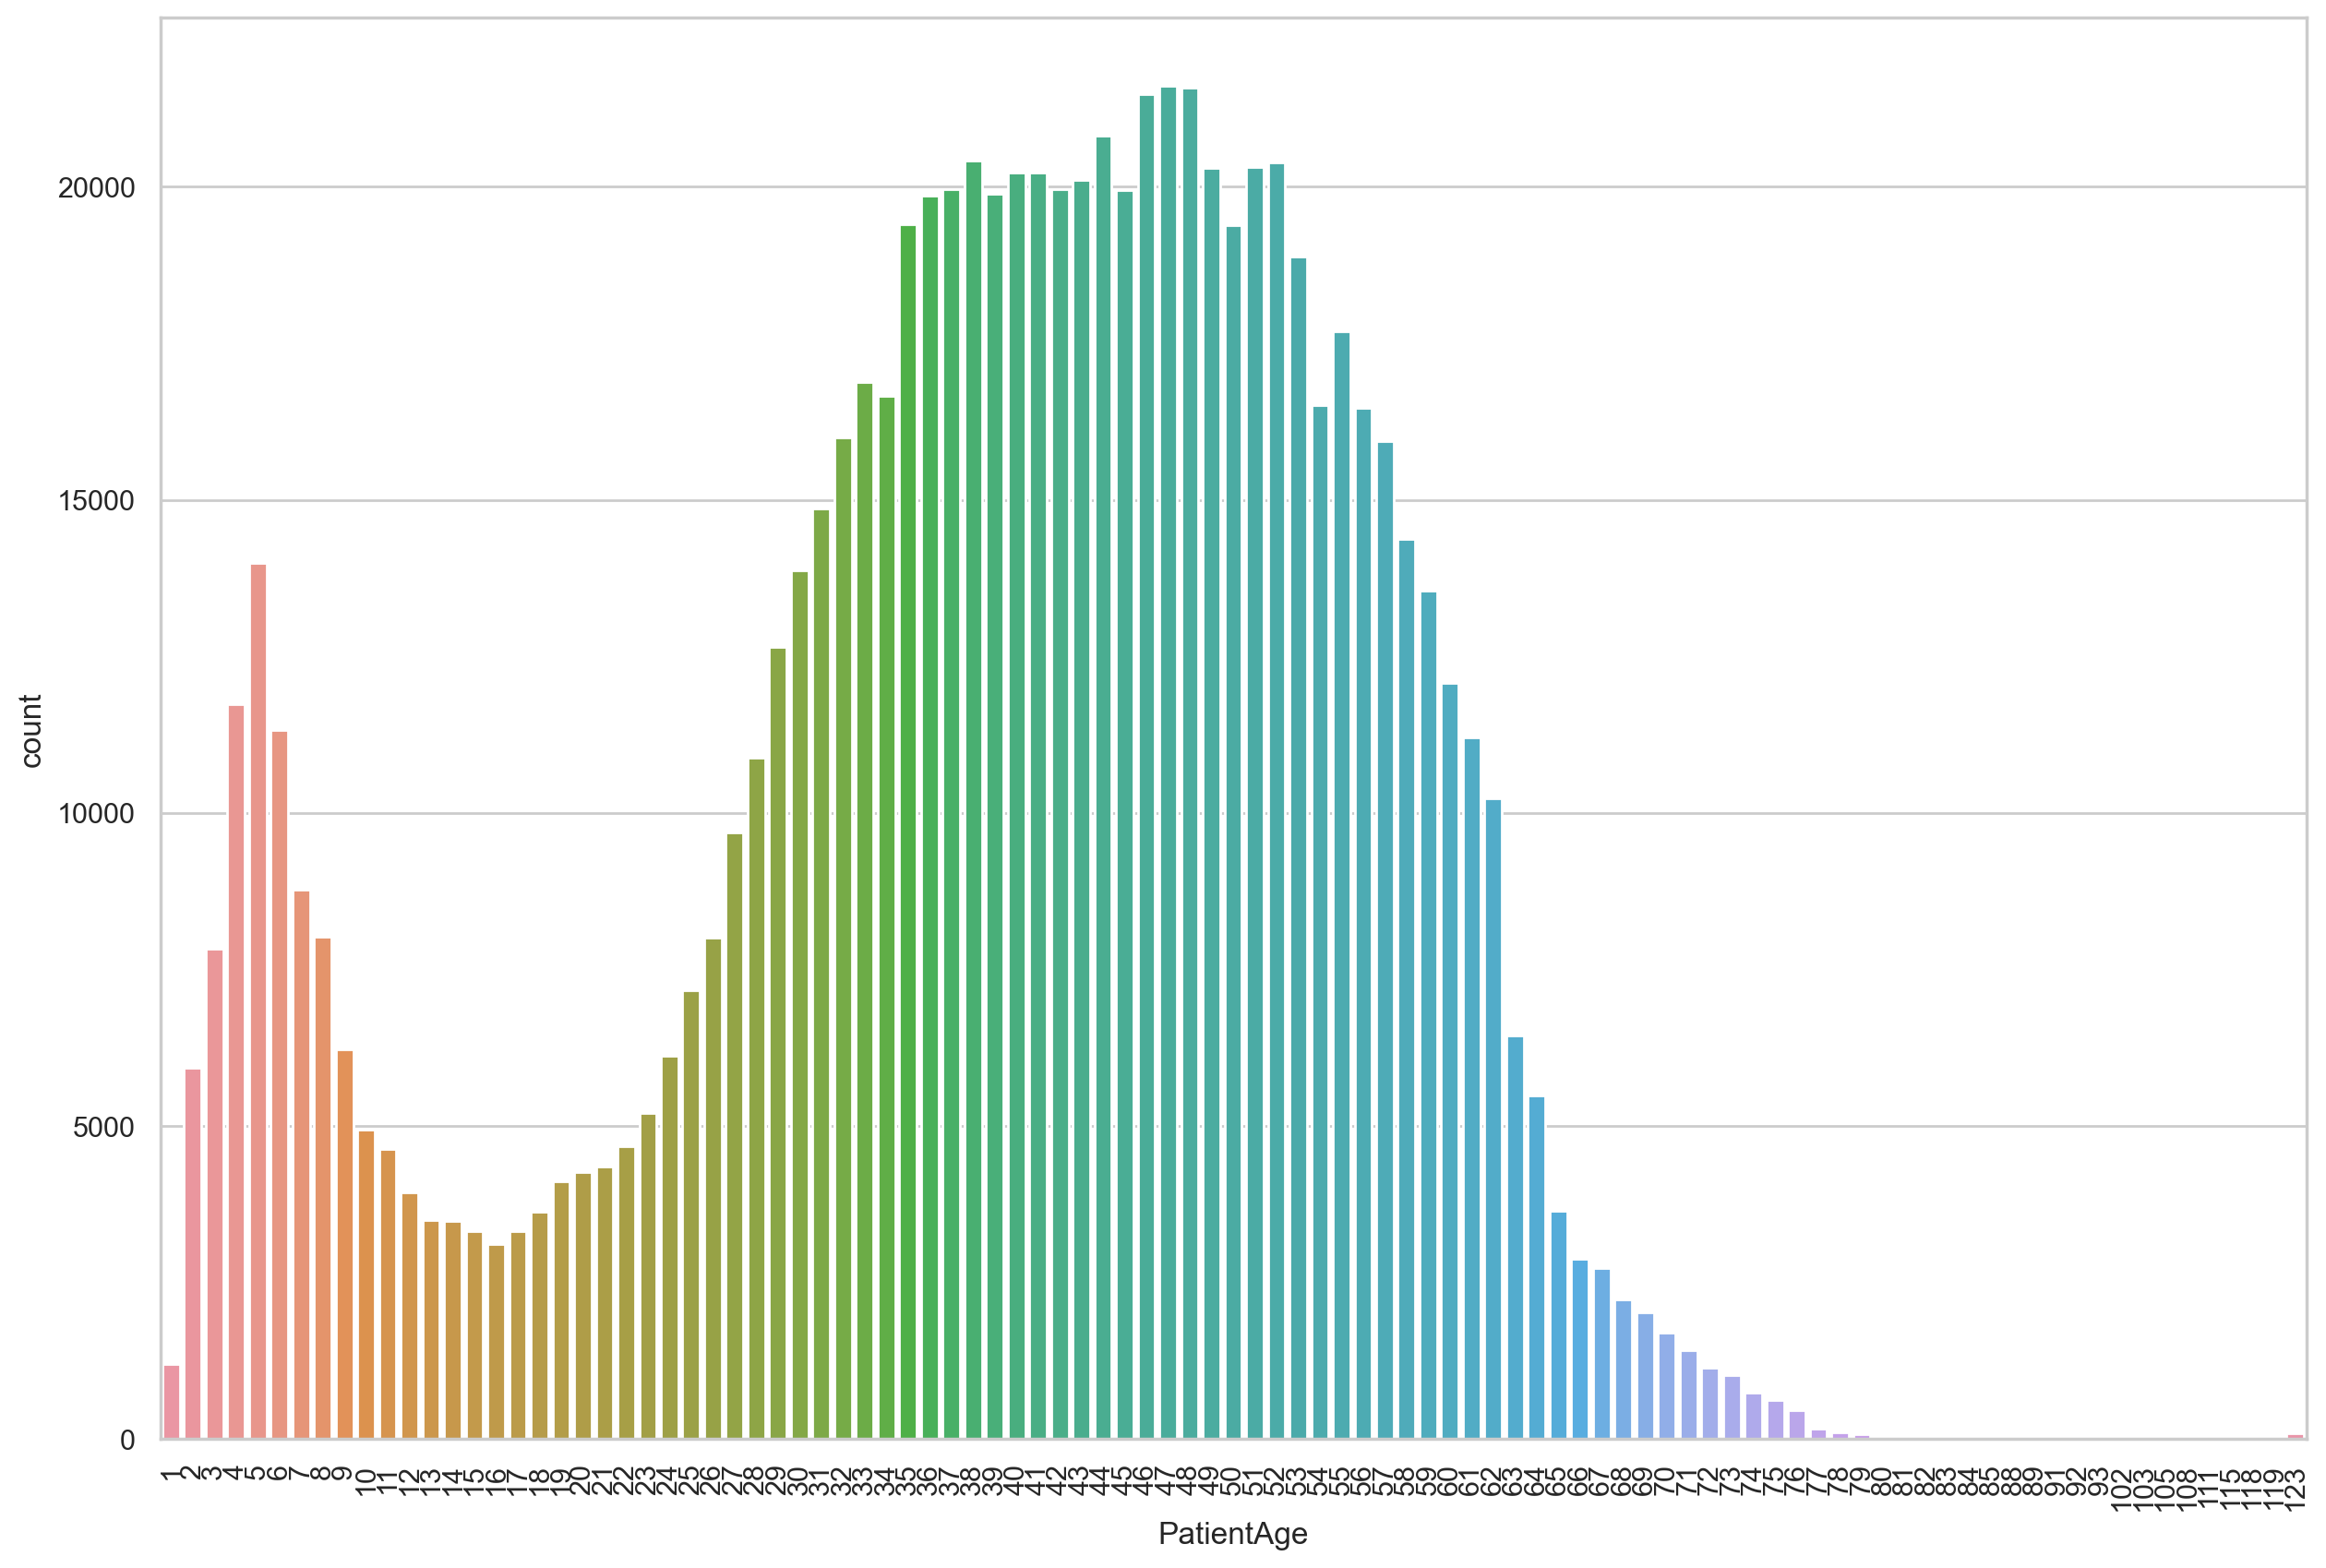

In [35]:
plt.figure(figsize=(15,10),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df2, x='PatientAge');

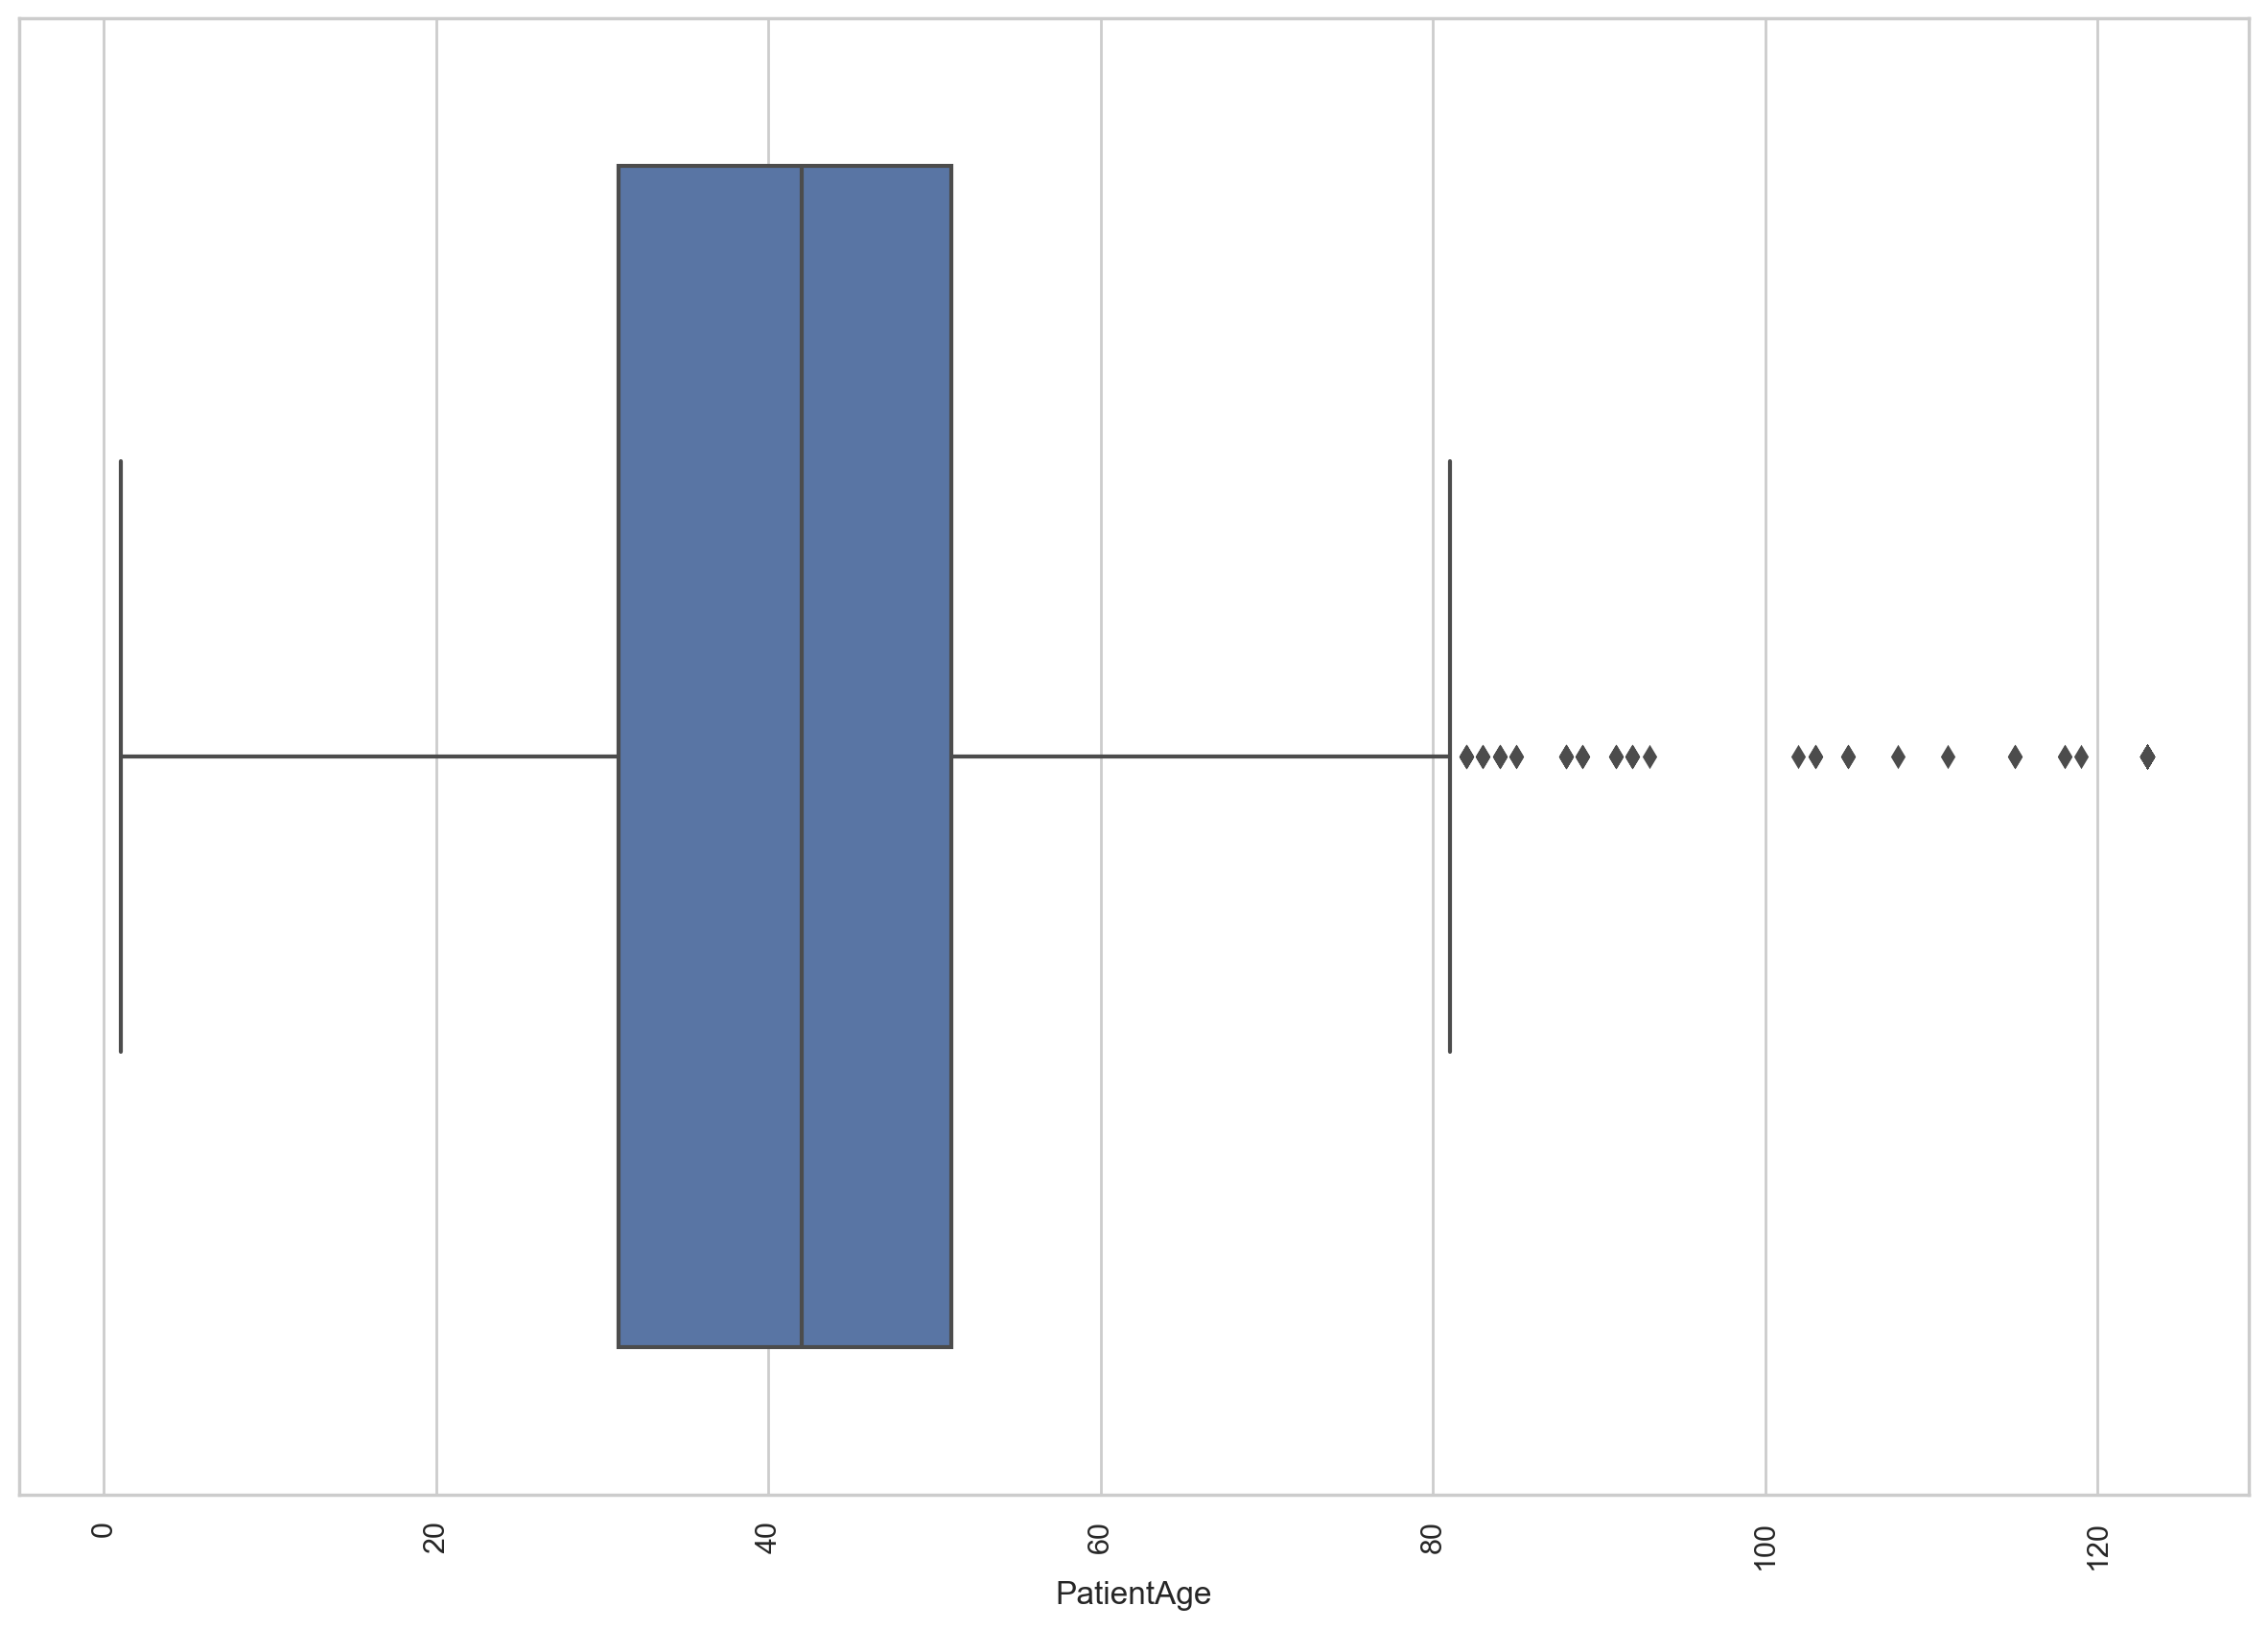

In [36]:
plt.figure(figsize=(15,10),dpi=200)
plt.xticks(rotation=90)
sns.boxplot(data=df2, x='PatientAge');

**3. `MCDays`**

<Axes: >

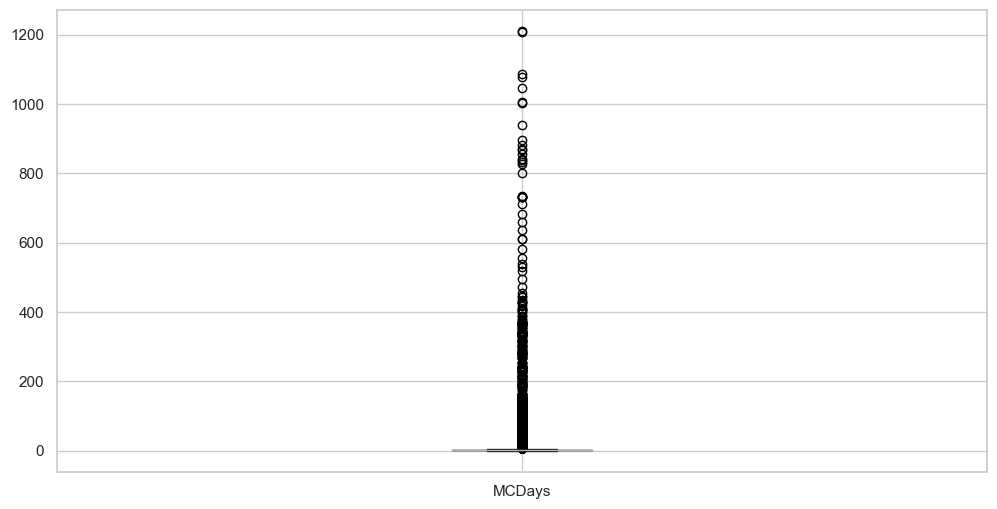

In [37]:
## MC Days
df2[['MCDays']].boxplot()
# df2.MCDays.value_counts().plot(kind="pie",
#                           title="MCDays")

<Axes: xlabel='MCDays'>

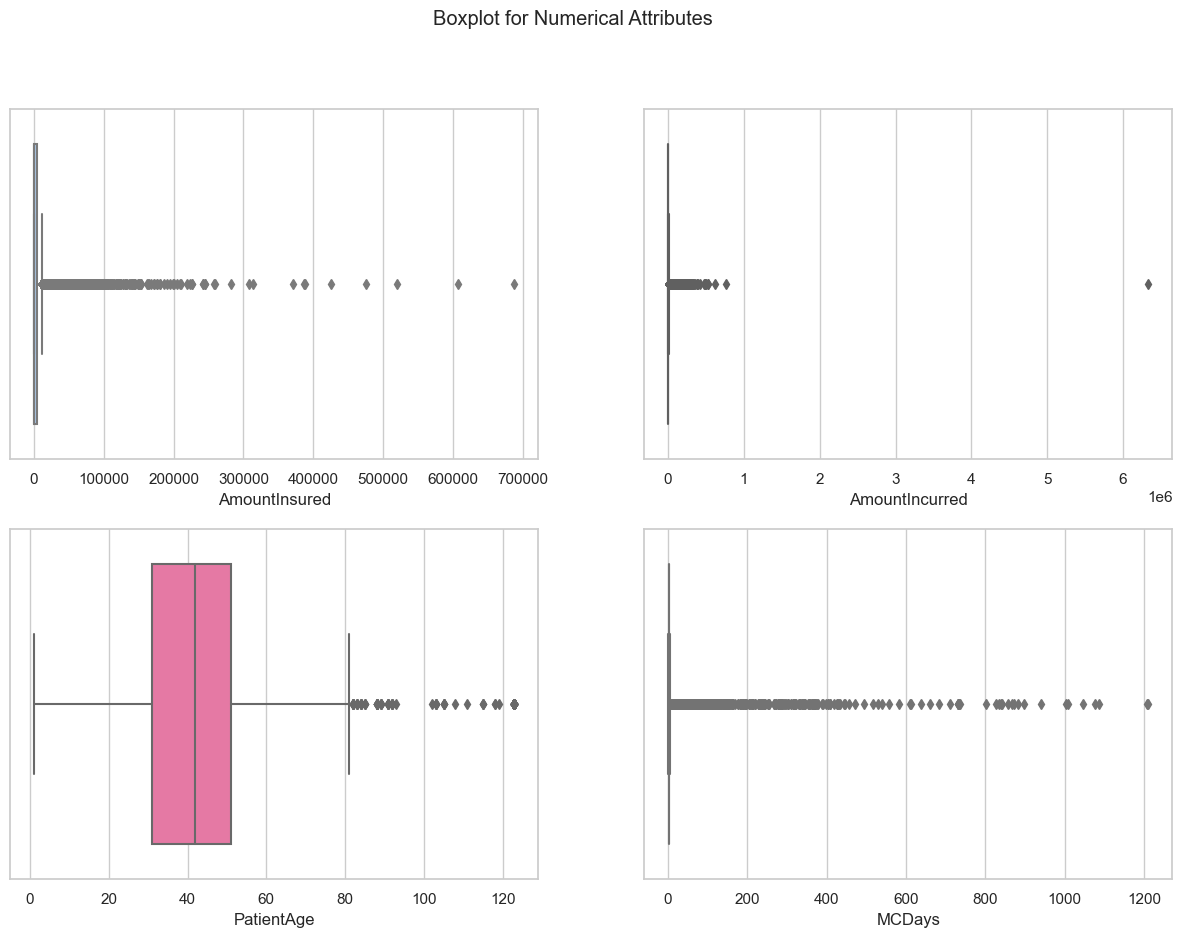

In [40]:
# plot boxplot of Numerical feature.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplot for Numerical Attributes')

sns.boxplot(x='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.boxplot(x='AmountIncurred', data=df2, ax=axes[0,1], palette='Blues')
sns.boxplot(x='PatientAge', data=df2, ax=axes[1,0], palette='RdPu')
sns.boxplot(x='MCDays', data=df2, ax=axes[1,1], palette='cool')

##### Categorical Variables

In [171]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3136.006881  3520.524246  2484.976  3597.803476
1             2961.967036  4973.943517  1209.575  4065.328873

<Axes: xlabel='IsPanel', ylabel='count'>

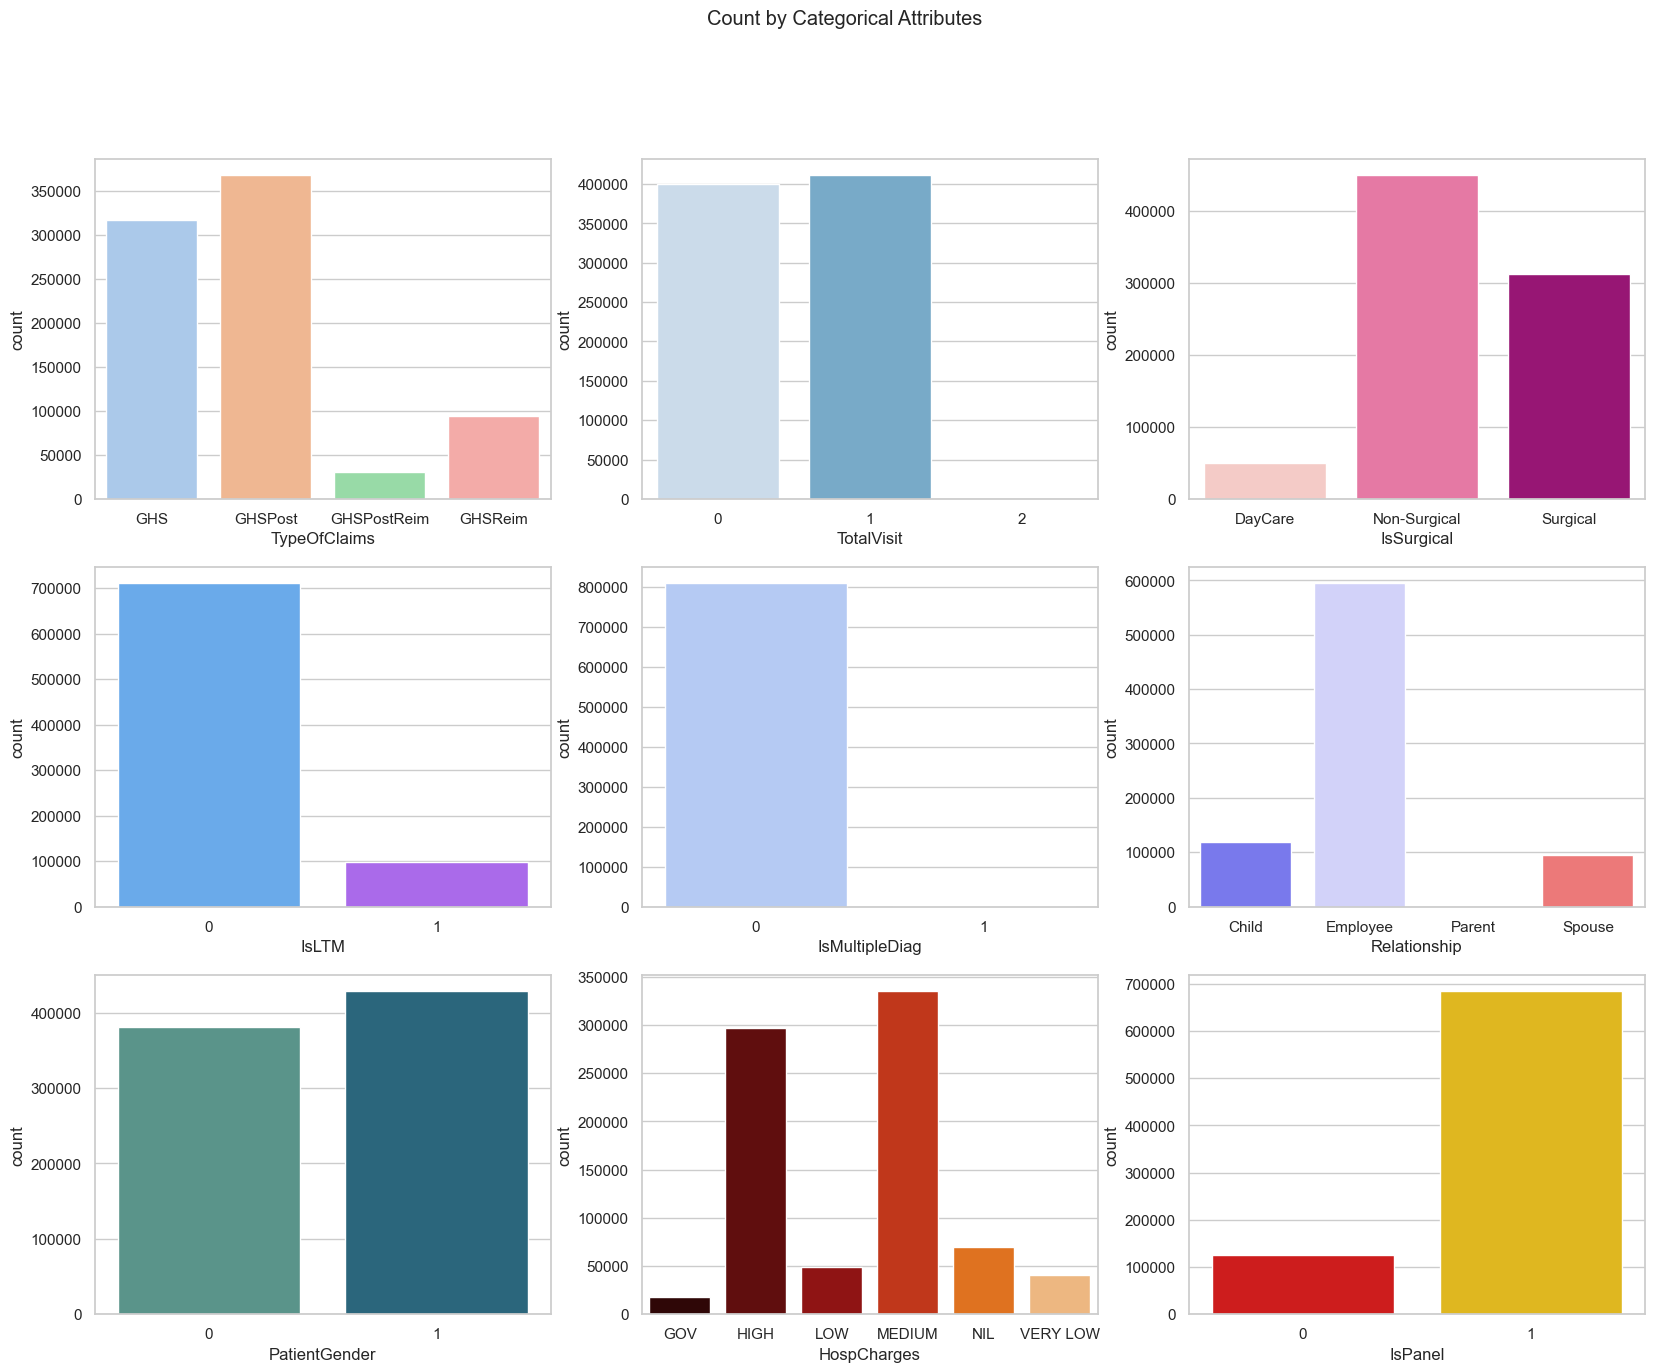

In [41]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Count by Categorical Attributes')

sns.countplot(x='TypeOfClaims', data=df2, ax=axes[0,0], palette='pastel')
sns.countplot(x='TotalVisit', data=df2, ax=axes[0,1], palette='Blues')
sns.countplot(x='IsSurgical', data=df2, ax=axes[0,2], palette='RdPu')
sns.countplot(x='IsLTM', data=df2, ax=axes[1,0], palette='cool')
sns.countplot(x='IsMultipleDiag', data=df2, ax=axes[1,1], palette='coolwarm')
sns.countplot(x='Relationship', data=df2, ax=axes[1,2], palette='bwr')
sns.countplot(x='PatientGender', data=df2, ax=axes[2,0], palette='crest')
sns.countplot(x='HospCharges', data=df2, ax=axes[2,1], palette='gist_heat')
sns.countplot(x='IsPanel', data=df2, ax=axes[2,2], palette='hot')

### Bivariate Analysis

In [45]:
# average carat weight and price by Cut
df2.groupby(by = 'Relationship').sum()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
Relationship                                                              
Child         3.349994e+05    3.909029e+08   3.739100e+08  1.699286e+07   
Employee      1.488914e+06    2.344180e+09   2.208603e+09  1.355764e+08   
Parent        2.900000e+01    7.557468e+04   2.726891e+04  4.830577e+04   
Spouse        2.332699e+05    3.782952e+08   3.526912e+08  2.560404e+07   

              TotalVisit  IsLTM  IsMultipleDiag  PatientAge  IsPanel  \
Relationship                                                           
Child              68116   3455              59     1296933   109987   
Employee          301103  78327             635    26101830   488296   
Parent                11      2               0         827        4   
Spouse             41607  17273              51     4454973    86932   

                    Year  ...  c_IsSurgical  c_Relationship  c_AgeBand  \
Relationship              ...                                            
Child          241280913  ...        144784               0      63246   
Employee      1202205801  ...        798254          595014    2331002   
Parent             24244  ...            15              24         68   
Spouse         193524424  ...        128510          287355     401861   

              c_PatientGender  c_MedicalProviders  c_DiagnosisGroup  \
Relationship                                                          
Child                   64299            78241347           6708802   
Employee               331652           426024914          36656881   
Parent                      7                5985               739   
Spouse                  32670            65479022           5608795   

              c_HospCharges  c_ProviderState  c_IndustryField  c_Corporate  
Relationship                                                                
Child                262749          3118210          9927288    415952402  
Employee            1422272         14264688         48632488   2199895718  
Parent                   25              363              774        52435  
Spouse               201164          2457720          8028488    334795570  

[4 rows x 22 columns]

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

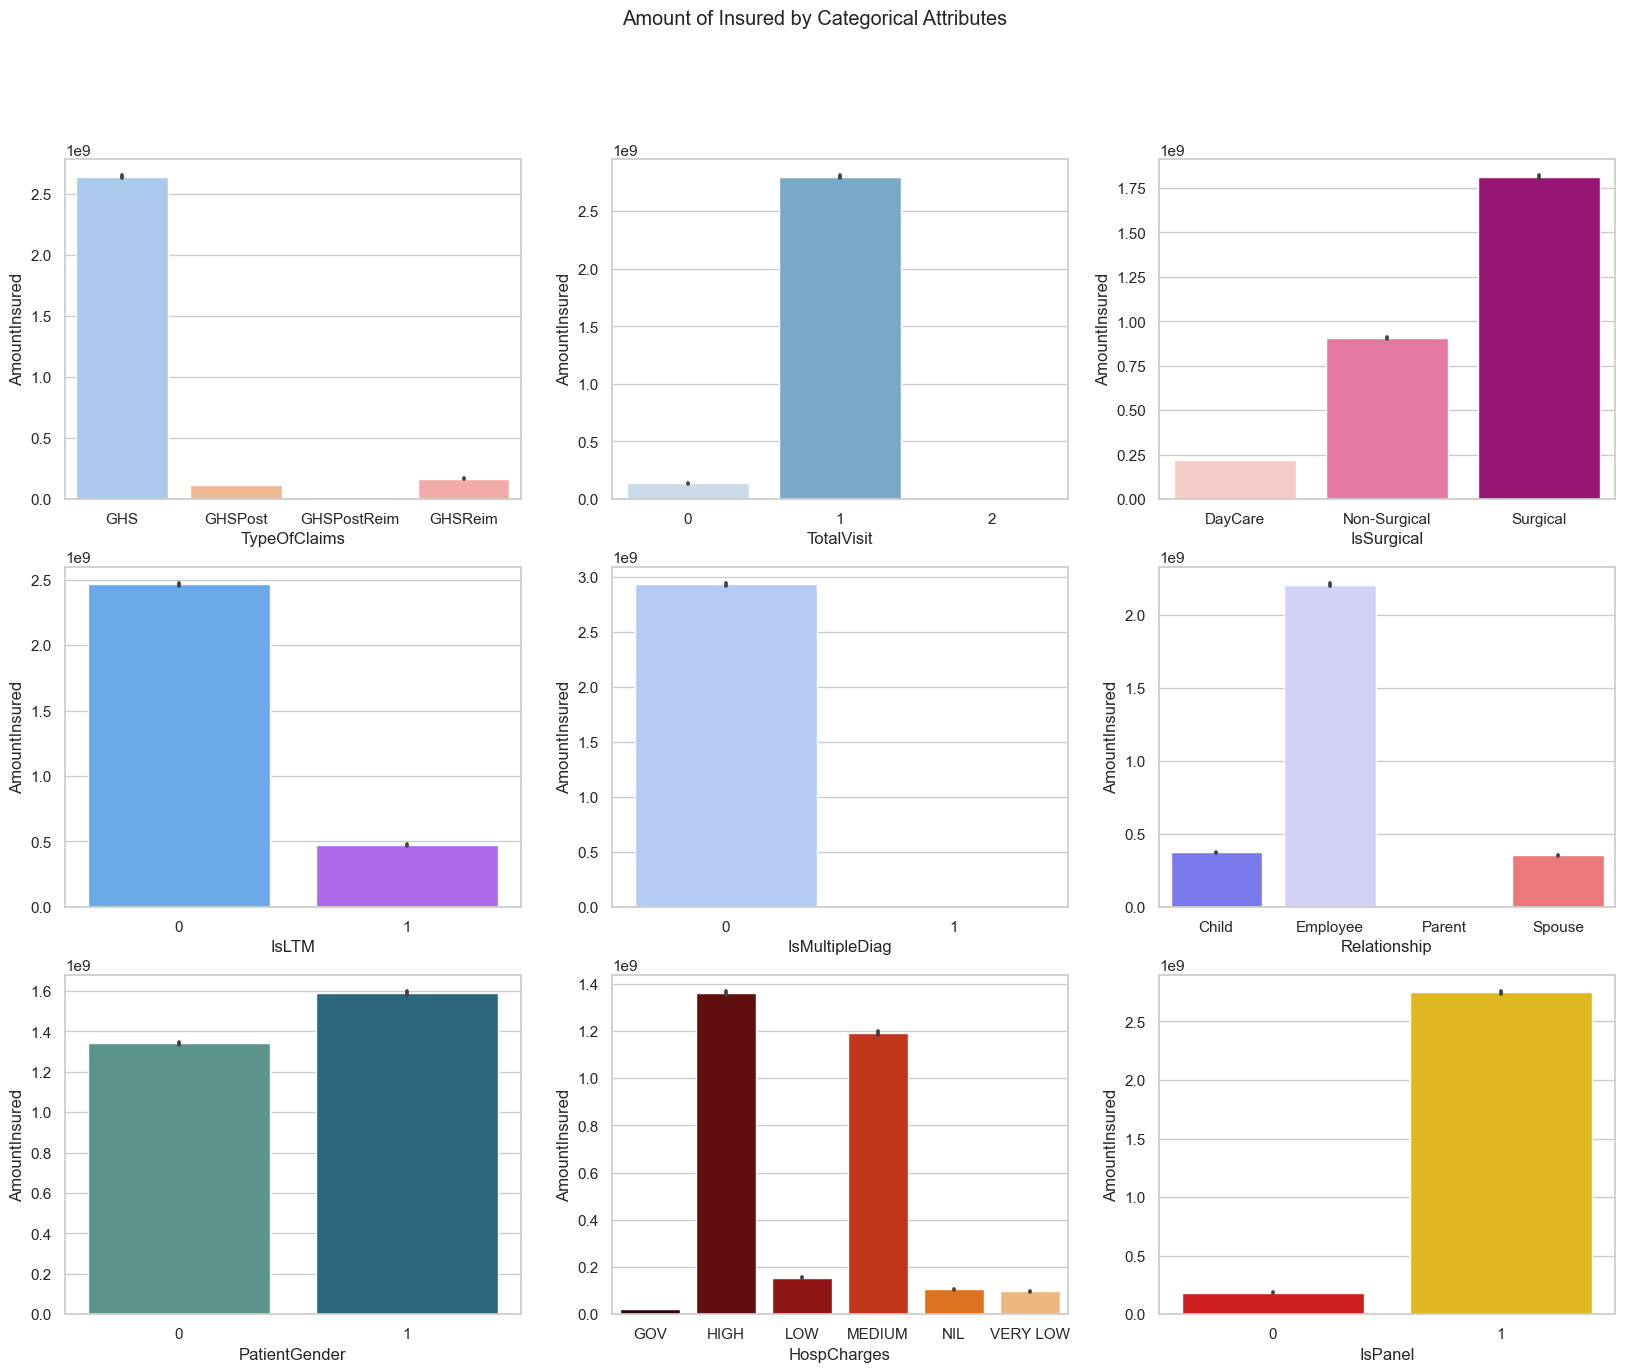

In [48]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Amount of Insured by Categorical Attributes')

sns.barplot(x='TypeOfClaims', y='AmountInsured', data=df2, estimator=sum, ax=axes[0,0], palette='pastel')
sns.barplot(x='TotalVisit', y='AmountInsured', data=df2, estimator=sum,ax=axes[0,1], palette='Blues')
sns.barplot(x='IsSurgical', y='AmountInsured', data=df2, estimator=sum,ax=axes[0,2], palette='RdPu')
sns.barplot(x='IsLTM', y='AmountInsured', data=df2, estimator=sum,ax=axes[1,0], palette='cool')
sns.barplot(x='IsMultipleDiag', y='AmountInsured', data=df2, estimator=sum,ax=axes[1,1], palette='coolwarm')
sns.barplot(x='Relationship', y='AmountInsured', data=df2, estimator=sum,ax=axes[1,2], palette='bwr')
sns.barplot(x='PatientGender', y='AmountInsured', data=df2,estimator=sum, ax=axes[2,0], palette='crest')
sns.barplot(x='HospCharges', y='AmountInsured', data=df2, estimator=sum,ax=axes[2,1], palette='gist_heat')
sns.barplot(x='IsPanel', y='AmountInsured', data=df2, estimator=sum,ax=axes[2,2], palette='hot')

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

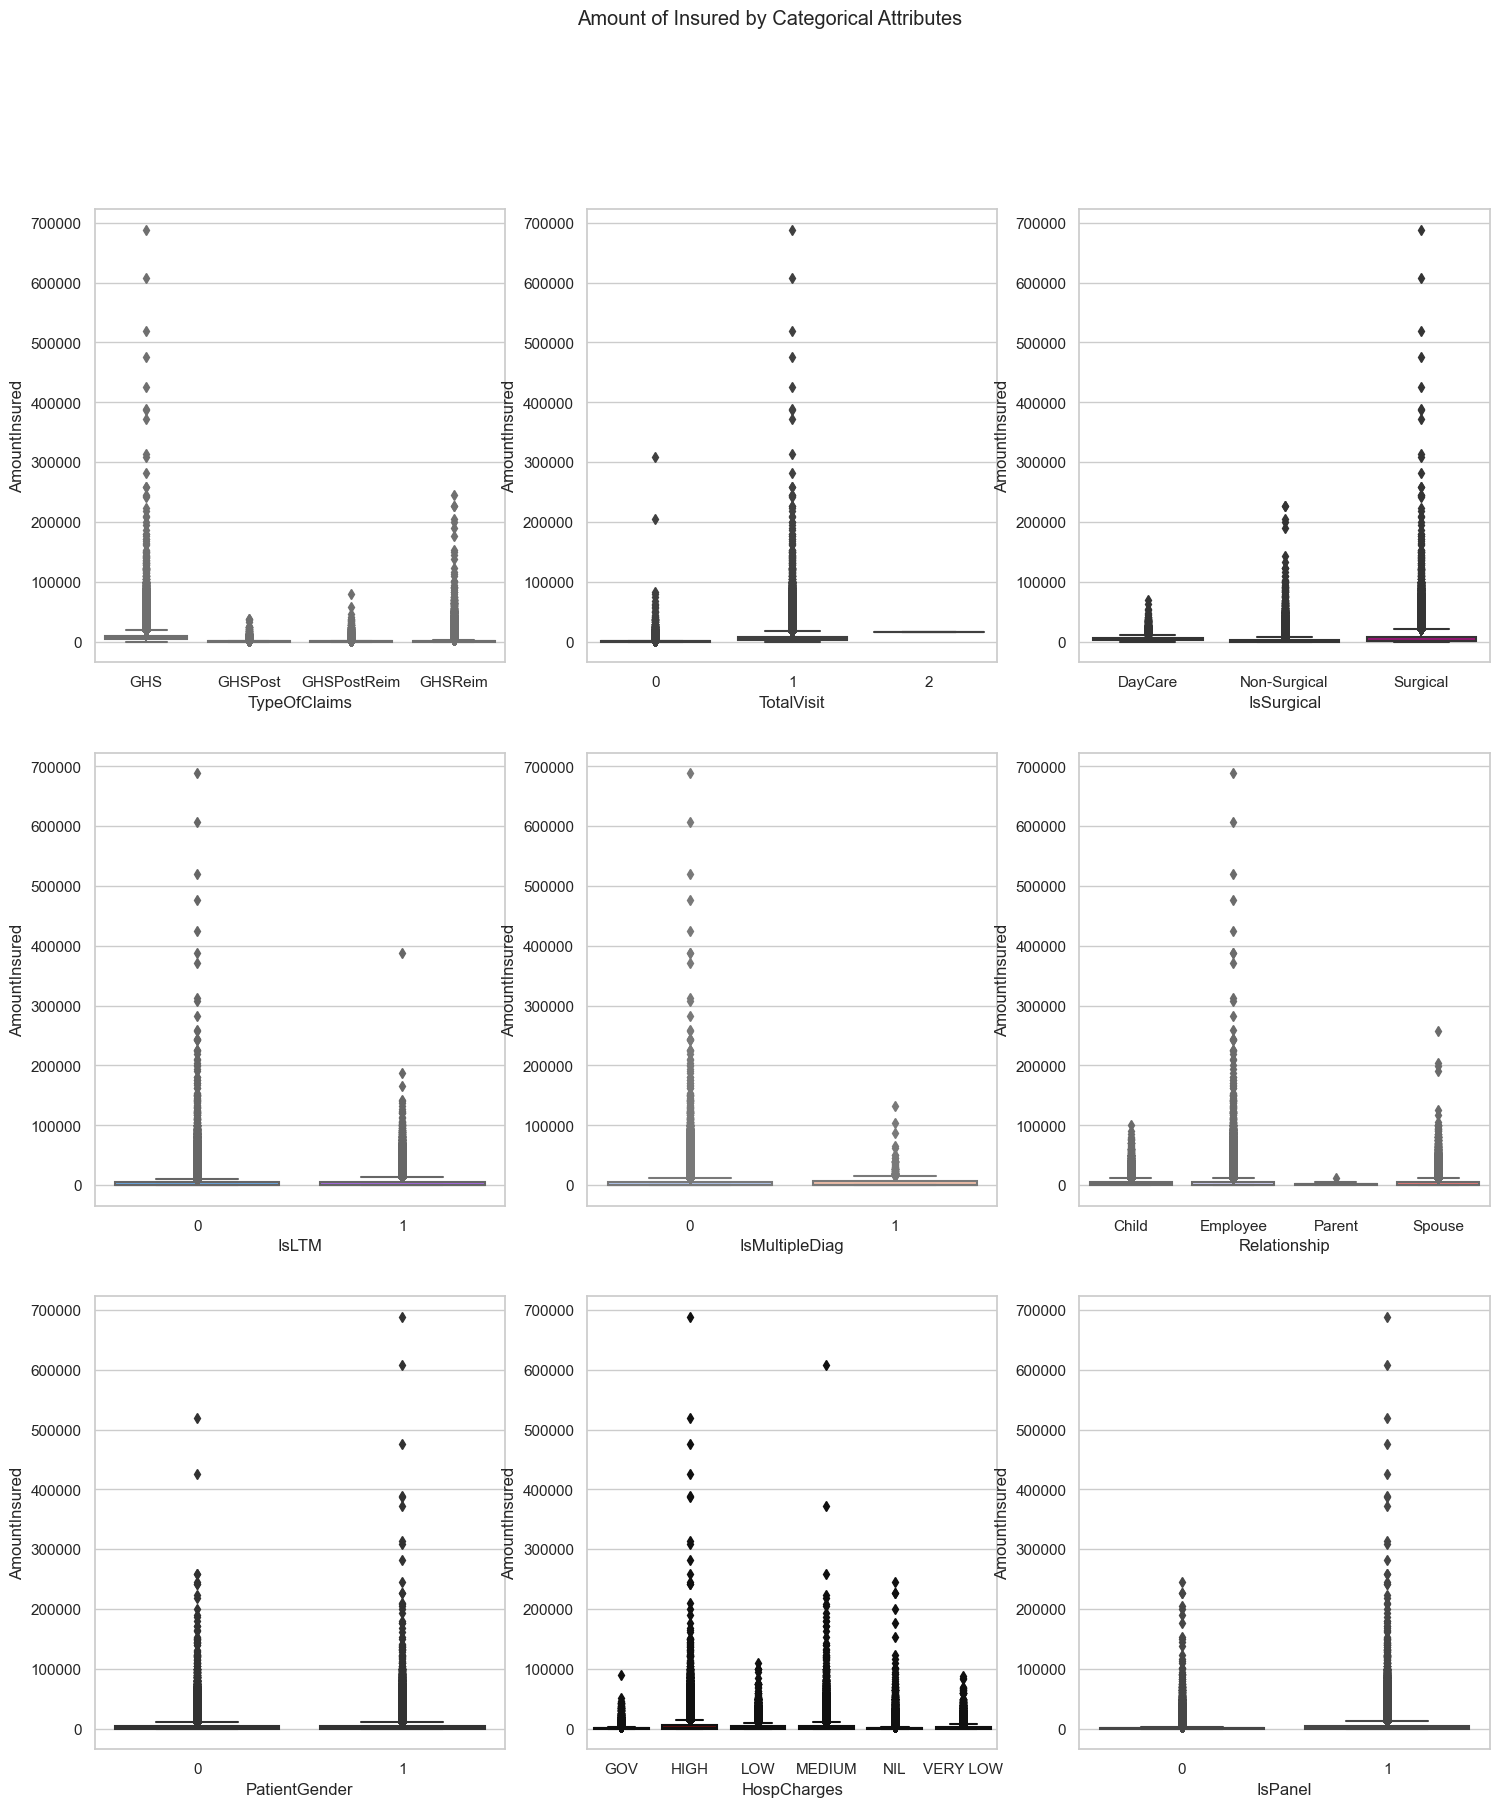

In [49]:
# plot boxplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
fig.suptitle('Amount of Insured by Categorical Attributes')

sns.boxplot(x='TypeOfClaims', y='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.boxplot(x='TotalVisit', y='AmountInsured', data=df2, ax=axes[0,1], palette='Blues')
sns.boxplot(x='IsSurgical', y='AmountInsured', data=df2, ax=axes[0,2], palette='RdPu')
sns.boxplot(x='IsLTM', y='AmountInsured', data=df2, ax=axes[1,0], palette='cool')
sns.boxplot(x='IsMultipleDiag', y='AmountInsured', data=df2, ax=axes[1,1], palette='coolwarm')
sns.boxplot(x='Relationship', y='AmountInsured', data=df2, ax=axes[1,2], palette='bwr')
sns.boxplot(x='PatientGender', y='AmountInsured', data=df2, ax=axes[2,0], palette='crest')
sns.boxplot(x='HospCharges', y='AmountInsured', data=df2, ax=axes[2,1], palette='gist_heat')
sns.boxplot(x='IsPanel', y='AmountInsured', data=df2, ax=axes[2,2], palette='hot')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

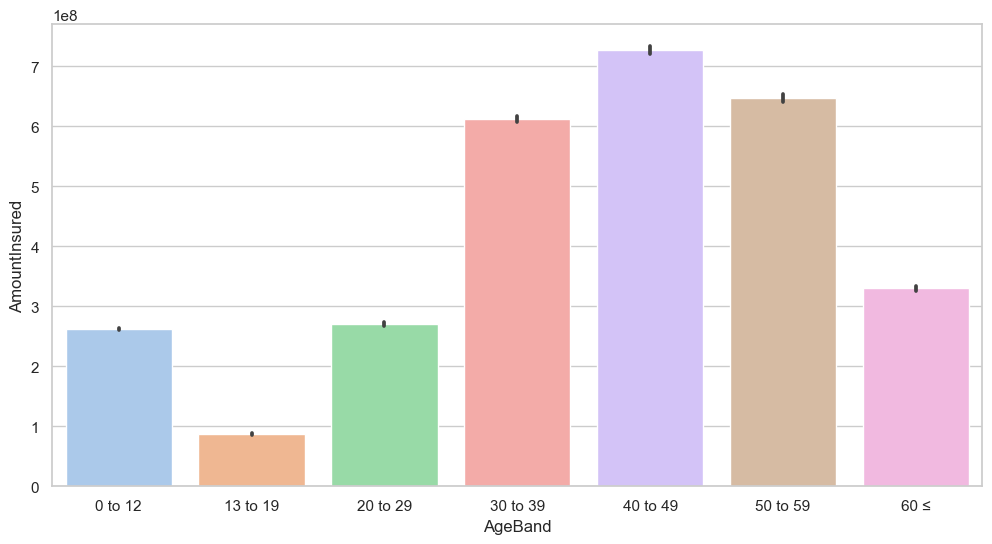

In [47]:
sns.barplot(x='AgeBand', y='AmountInsured', data=df2, estimator=sum, palette='pastel')

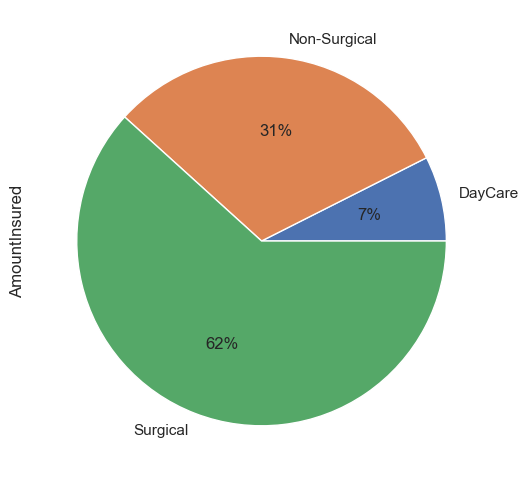

In [50]:
#groupby the data by delivery type
data = df2.groupby("IsSurgical")["AmountInsured"].sum()
data.plot.pie(autopct="%.0f%%");

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

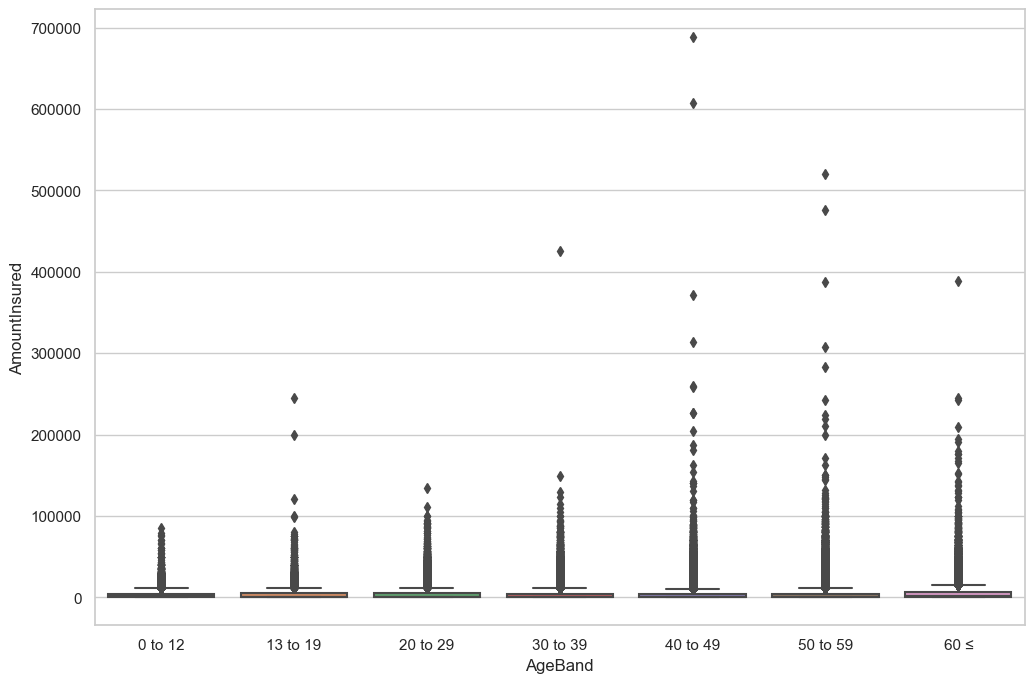

In [52]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='AgeBand', y='AmountInsured')

In [54]:
# Amount of Insured by Year-Months
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='Year', aggfunc=np.sum).sort_values(by='Year', ascending=False).head(10)

AmountInsured
Year               
2022   8.367939e+08
2021   6.775573e+08
2020   6.789494e+08
2019   7.419310e+08

In [55]:
# create pivot table
pd.pivot_table(df2, values=['AmountInsured','AmountIncurred','ExcessPaid','MCDays'], index='Year', aggfunc=np.sum).sort_values(by='Year', ascending=False).head(10)

AmountIncurred  AmountInsured   ExcessPaid         MCDays
Year                                                           
2022    8.884259e+08   8.367939e+08  51632012.60  493329.000000
2021    7.270289e+08   6.775573e+08  49471551.11  468713.003576
2020    7.206138e+08   6.789494e+08  41664424.32  520961.320687
2019    7.773847e+08   7.419310e+08  35453613.23  574209.044856

#### Top 10 `MedicalProviders` by `AmountInsured`

In [56]:
## Top 10 Medical Providers
#df2.groupby('MedicalProviders')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='MedicalProviders', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
MedicalProviders                                               
SUNWAY MEDICAL CENTRE                              1.669081e+08
SUBANG JAYA MEDICAL CENTRE                         1.089028e+08
KPJ PUSAT PAKAR MATA CENTRE FOR SIGHT (DAY CARE)   9.128735e+07
OTHERS                                             8.181247e+07
PANTAI HOSPITAL KUALA LUMPUR                       7.324319e+07
THOMSON HOSPITAL KOTA DAMANSARA                    6.592861e+07
GLENEAGLES KUALA LUMPUR                            6.282350e+07
PANTAI HOSPITAL PENANG                             5.769350e+07
KPJ SELANGOR SPECIALIST HOSPITAL                   5.486053e+07
AVISENA SPECIALIST HOSPITAL                        5.105953e+07

<Axes: title={'center': 'Top 10 Medical Providers'}, ylabel='MedicalProviders'>

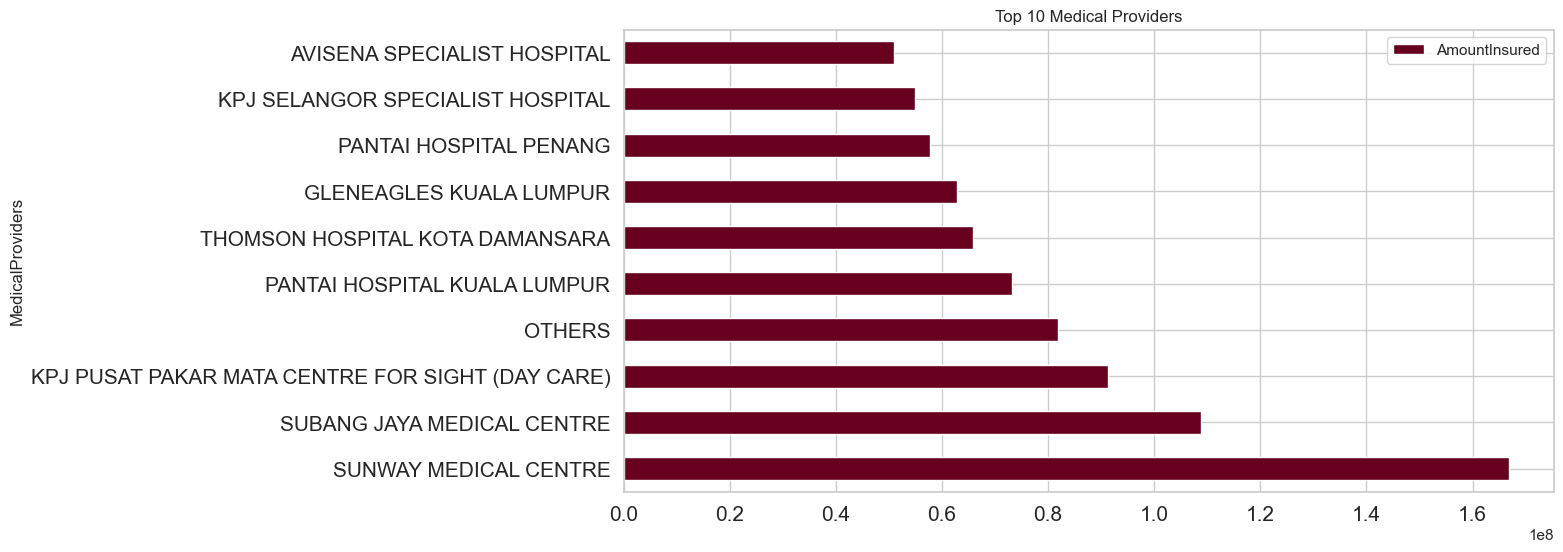

In [57]:
df8 = pd.pivot_table(df2, values='AmountInsured', index='MedicalProviders', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)
df8.plot(kind='barh', colormap='RdGy', title= 'Top 10 Medical Providers',fontsize = 15)

#### Top 10 `ProviderState` by `AmountInsured`

In [172]:
## Top 10 Medical Providers
#df2.groupby('MedicalProviders')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='ProviderState', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
ProviderState                 
SELANGOR          1.077113e+09
KUALA LUMPUR      5.132957e+08
PULAU PINANG      3.367199e+08
JOHOR             2.445458e+08
NEGERI SEMBILAN   1.608751e+08
PERAK             1.347815e+08
KEDAH             1.060484e+08
MELAKA            1.041787e+08
OTHER             8.240556e+07
SARAWAK           6.219784e+07

<Axes: title={'center': 'Top 10 Provider State'}, xlabel='ProviderState'>

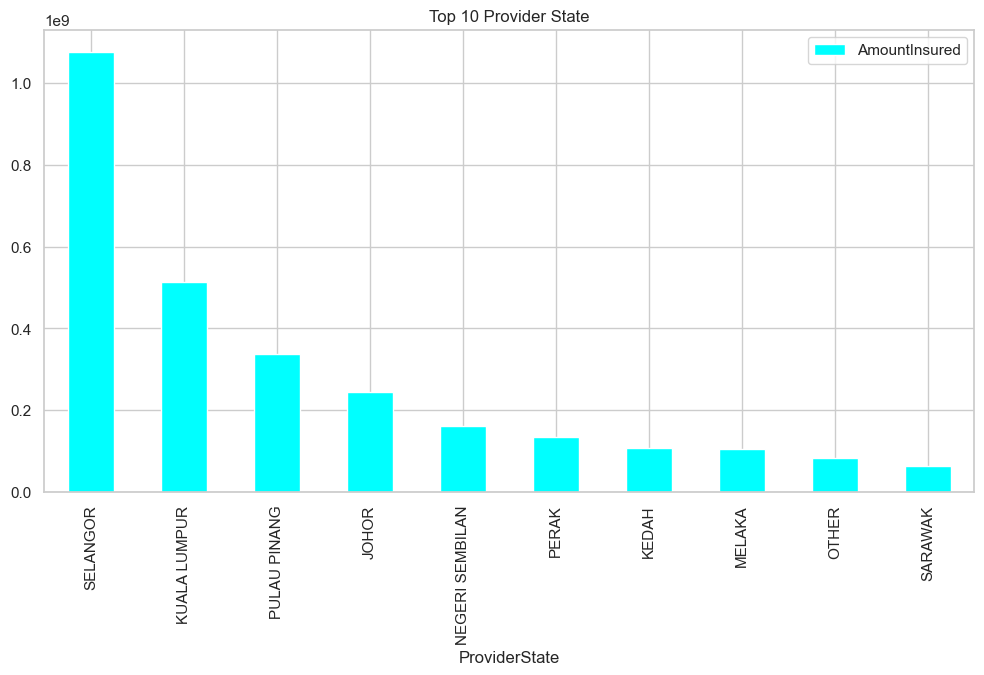

In [58]:
df8 = pd.pivot_table(df2, values='AmountInsured', index='ProviderState', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)
df8.plot(kind='bar', colormap='cool', title= 'Top 10 Provider State')

#### Top 10 `IndustryField` by `AmountInsured`

In [59]:
## Top 10 Industry Field
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
IndustryField                               
Insurance                       5.672709e+08
Financial Services              2.842362e+08
Aviation/Airline                1.323753e+08
Manufacturing Factory/Company   1.040030e+08
Education                       7.713239e+07
Transport Services              6.435914e+07
Electronic                      6.369160e+07
Semi-Conductor                  6.082832e+07
Goverment Department            6.013261e+07
Manufacturing - Food Product    5.865912e+07

In [61]:
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', columns='Year', aggfunc=np.sum, margins = True, margins_name='Total').sort_values(by='Total', ascending=False).head(11)

Year                                   2019          2020          2021  \
IndustryField                                                             
Total                          7.419310e+08  6.789494e+08  6.775573e+08   
Insurance                      1.399505e+08  1.309060e+08  1.309551e+08   
Financial Services             7.136844e+07  6.260233e+07  7.024068e+07   
Aviation/Airline               4.062249e+07  3.202355e+07  2.814071e+07   
Manufacturing Factory/Company  2.511286e+07  2.032130e+07  2.187962e+07   
Education                      2.090668e+07  1.865028e+07  1.894077e+07   
Transport Services             1.880644e+07  1.531037e+07  1.424083e+07   
Electronic                     1.810272e+07  1.563050e+07  1.388876e+07   
Semi-Conductor                 9.876054e+06  1.558562e+07  1.667376e+07   
Goverment Department           1.480508e+07  1.594952e+07  1.226797e+07   
Manufacturing - Food Product   1.365242e+07  1.367983e+07  1.476678e+07   

Year                                   2022         Total  
IndustryField                                              
Total                          8.367939e+08  2.935232e+09  
Insurance                      1.654593e+08  5.672709e+08  
Financial Services             8.002472e+07  2.842362e+08  
Aviation/Airline               3.158853e+07  1.323753e+08  
Manufacturing Factory/Company  3.668917e+07  1.040030e+08  
Education                      1.863466e+07  7.713239e+07  
Transport Services             1.600150e+07  6.435914e+07  
Electronic                     1.606963e+07  6.369160e+07  
Semi-Conductor                 1.869288e+07  6.082832e+07  
Goverment Department           1.711004e+07  6.013261e+07  
Manufacturing - Food Product   1.656009e+07  5.865912e+07

<Axes: title={'center': 'Top 10 Industry Field'}, xlabel='IndustryField'>

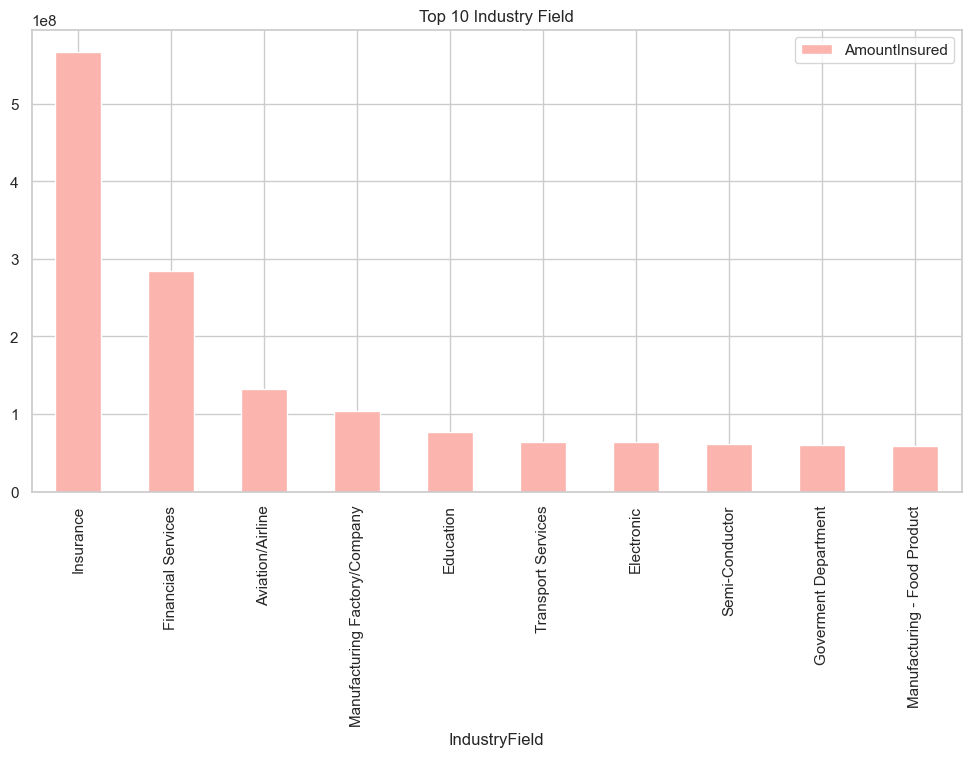

In [60]:
df8 = pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)
df8.plot(kind='bar', colormap='Pastel1', title= 'Top 10 Industry Field')

#### Top 10 `DiagnosisGroup` by `AmountInsured`

In [62]:
## Top 10 Diagnosis Group
#df2.groupby('DiagnosisGroup')['AmountInsured'].sum().nlargest(10)


# create pivot table = Change to %
pd.pivot_table(df2, values='AmountInsured', index='DiagnosisGroup', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
DiagnosisGroup                                                   
Diseases of the digestive system                     3.989616e+08
Injury, poisoning and certain other consequence...   3.696267e+08
Diseases of the musculoskeletal system and conn...   3.532776e+08
Diseases of the respiratory system                   3.512514e+08
Diseases of the circulatory system                   2.891236e+08
Diseases of the genitourinary system                 2.825431e+08
Neoplasms                                            2.169126e+08
Certain infectious and parasitic diseases            1.988979e+08
Diseases of the skin and subcutaneous tissue         9.754703e+07
Diseases of the eye and adnexa                       9.209608e+07

<Axes: title={'center': 'Top 10 Diagnosis Group'}, ylabel='DiagnosisGroup'>

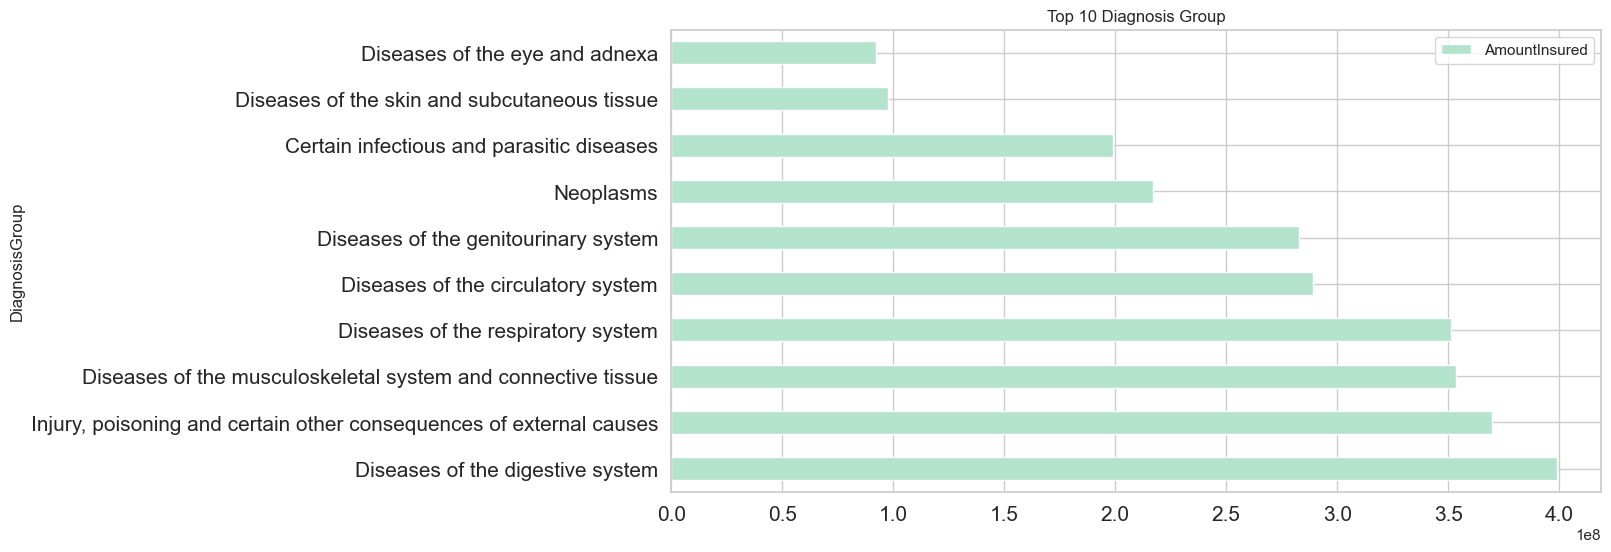

In [63]:
df8 = pd.pivot_table(df2, values='AmountInsured', index='DiagnosisGroup', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)
df8.plot(kind='barh', colormap='Pastel2', title= 'Top 10 Diagnosis Group', fontsize = 15)

####  `AgeBand` by `AmountInsured`

In [64]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='AgeBand', aggfunc=np.mean).sort_values(by='AgeBand', ascending=True).head(10)

AmountInsured
AgeBand                
0 to 12     2963.820770
13 to 19    3530.234312
20 to 29    3698.478980
30 to 39    3442.439009
40 to 49    3523.385711
50 to 59    3733.782039
60 ≤        4948.225693

<Axes: title={'center': 'Amount of Insured by Age Band'}, xlabel='AgeBand'>

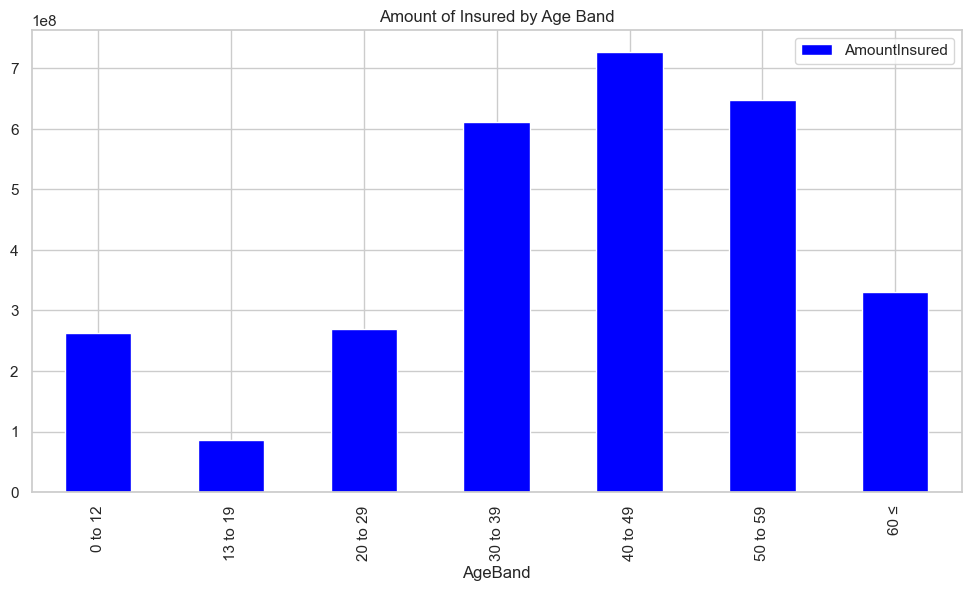

In [65]:
df8 = pd.pivot_table(df2, values='AmountInsured', index='AgeBand', aggfunc=np.sum).sort_values(by='AgeBand', ascending=True).head(10)
df8.plot(kind='bar', colormap='winter', title= 'Amount of Insured by Age Band')
#sns.barplot(data=df8, x='AgeBand', y='AmountInsured', palette = 'mako')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

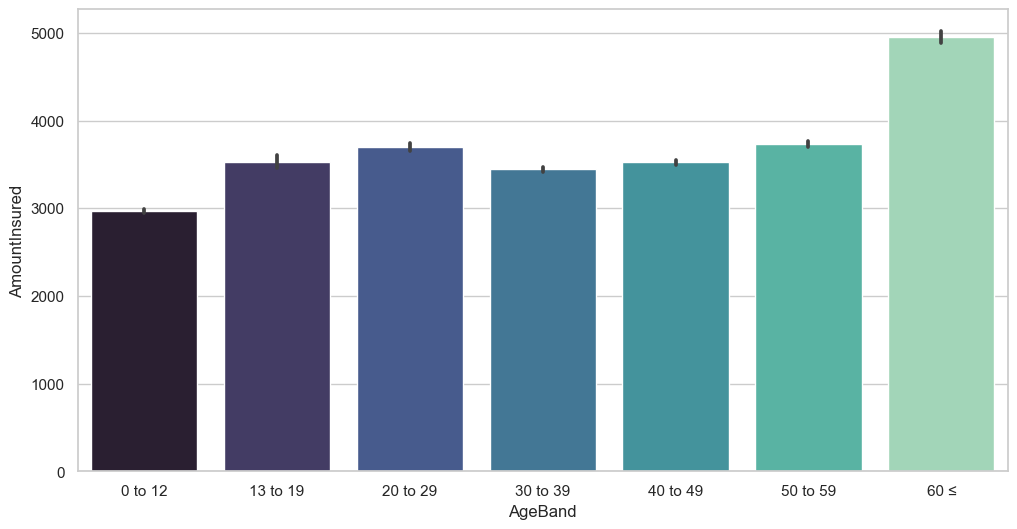

In [66]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', palette = 'mako')

### Mutivariate

In [67]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsSurgical', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee       Parent       Spouse
IsSurgical                                                      
DayCare       3847.660338  4358.080821  2000.000000  4570.720334
Non-Surgical  2636.704577  1841.933254  2951.742857  2033.641477
Surgical      4571.908770  6024.801643  1151.677500  5449.142767

In [68]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3136.006881  3520.524246  2484.976  3597.803476
1             2961.967036  4973.943517  1209.575  4065.328873

In [69]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='HospCharges', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee   Parent       Spouse
HospCharges                                                 
GOV            932.919091  1347.637819   306.50  1379.744545
HIGH          3525.102752  4906.212215  6328.40  4202.343912
LOW           2610.535446  3274.572652      NaN  3096.884044
MEDIUM        3199.688069  3615.925191   532.00  3613.841934
NIL           1666.383118  1476.651912  2106.56  2359.850817
VERY LOW      2057.054639  2488.002627  1473.05  2253.721904

<Axes: xlabel='DischargeDate', ylabel='AmountInsured'>

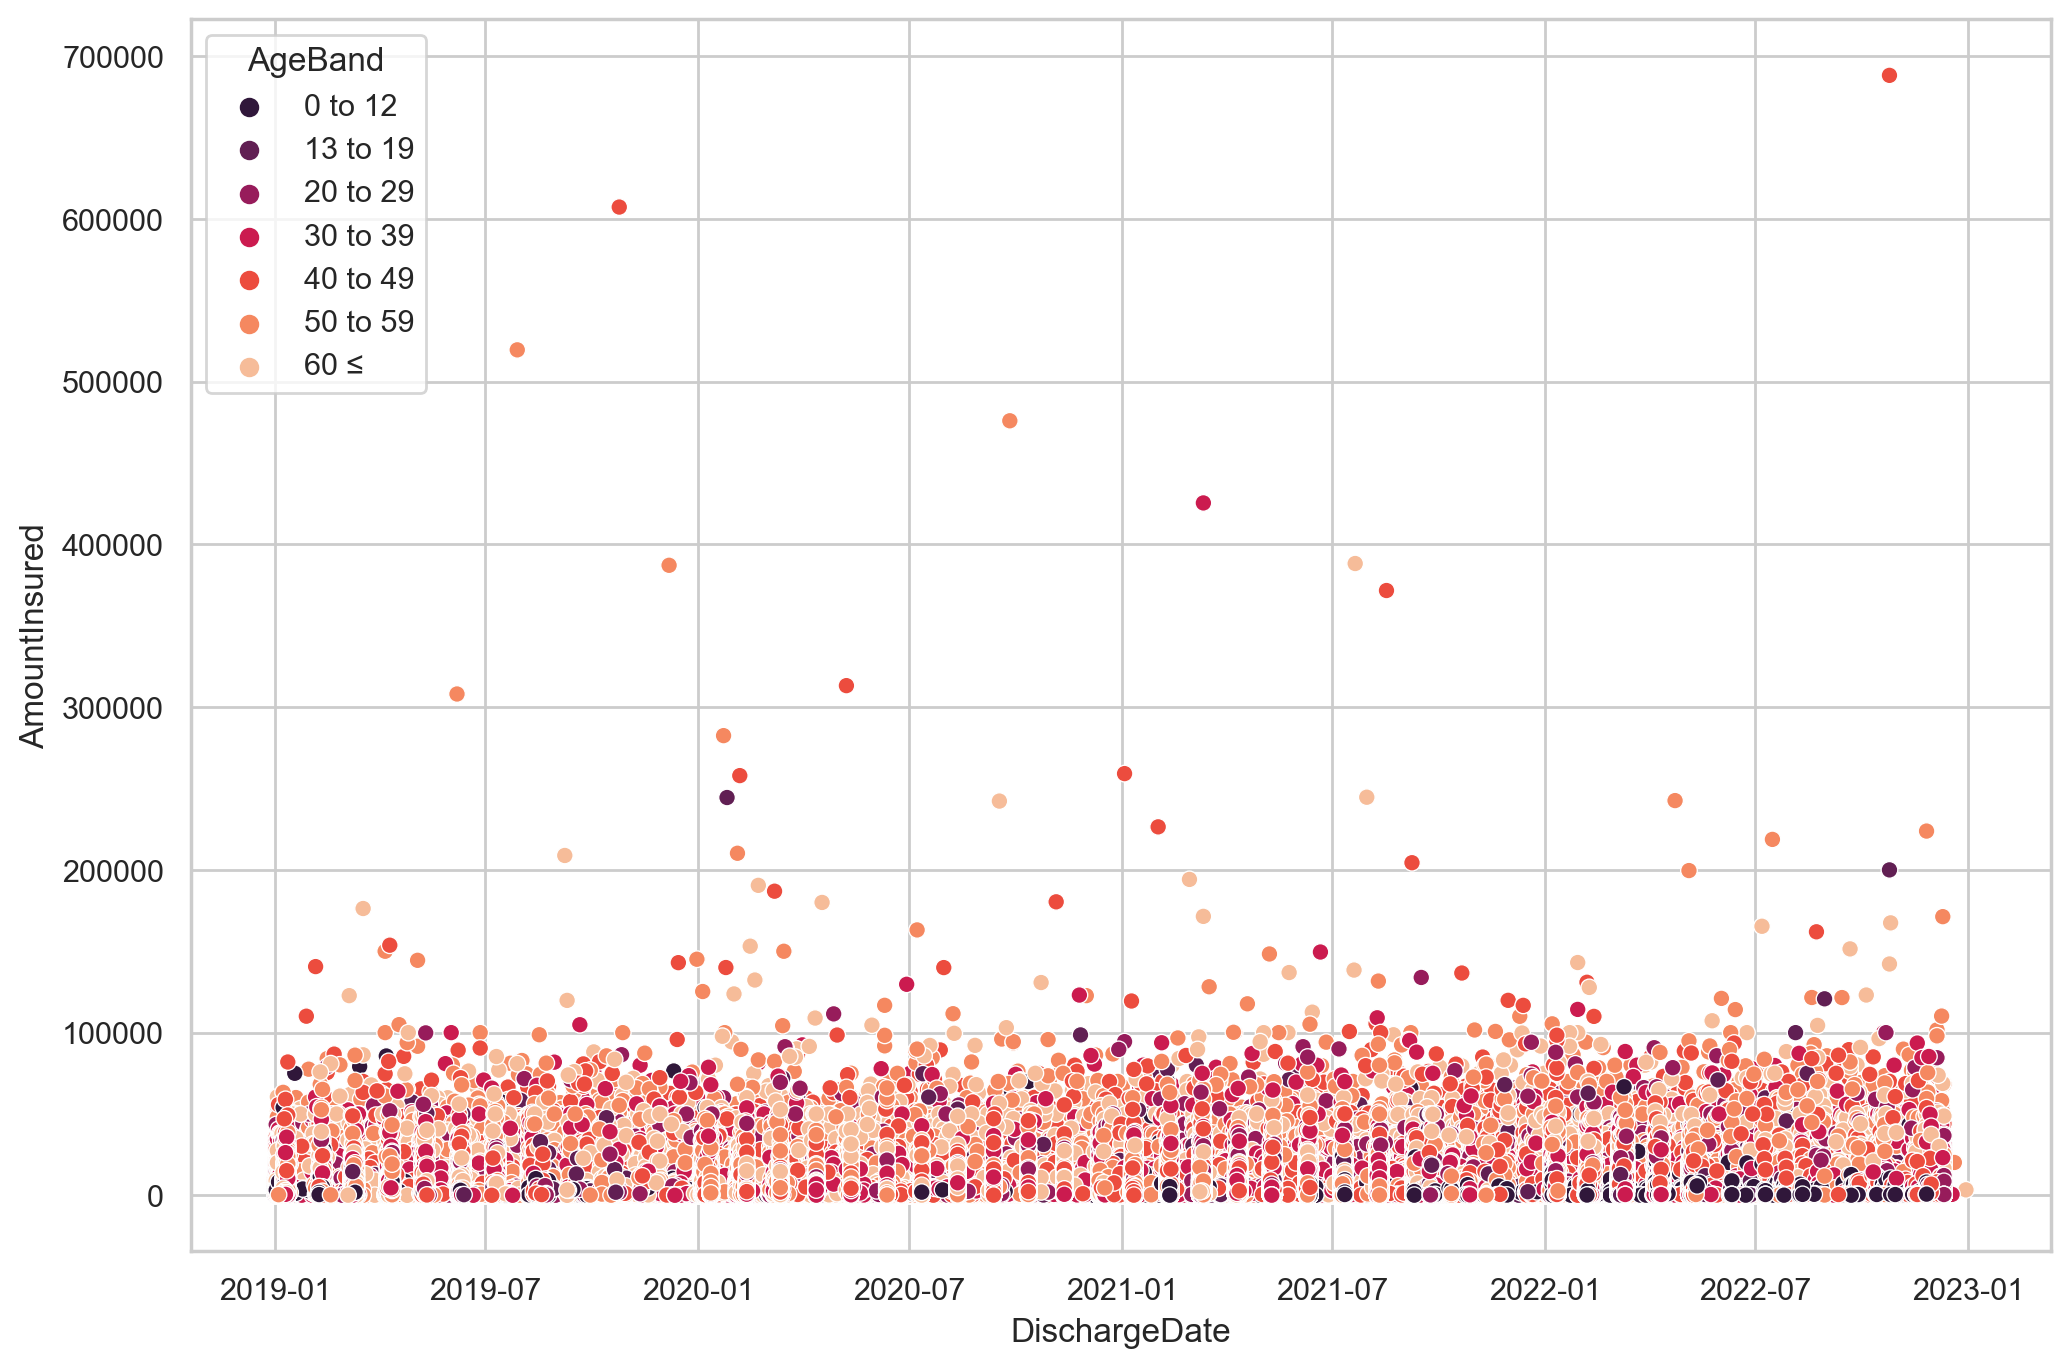

In [70]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='DischargeDate', y='AmountInsured', hue='AgeBand', palette='rocket')

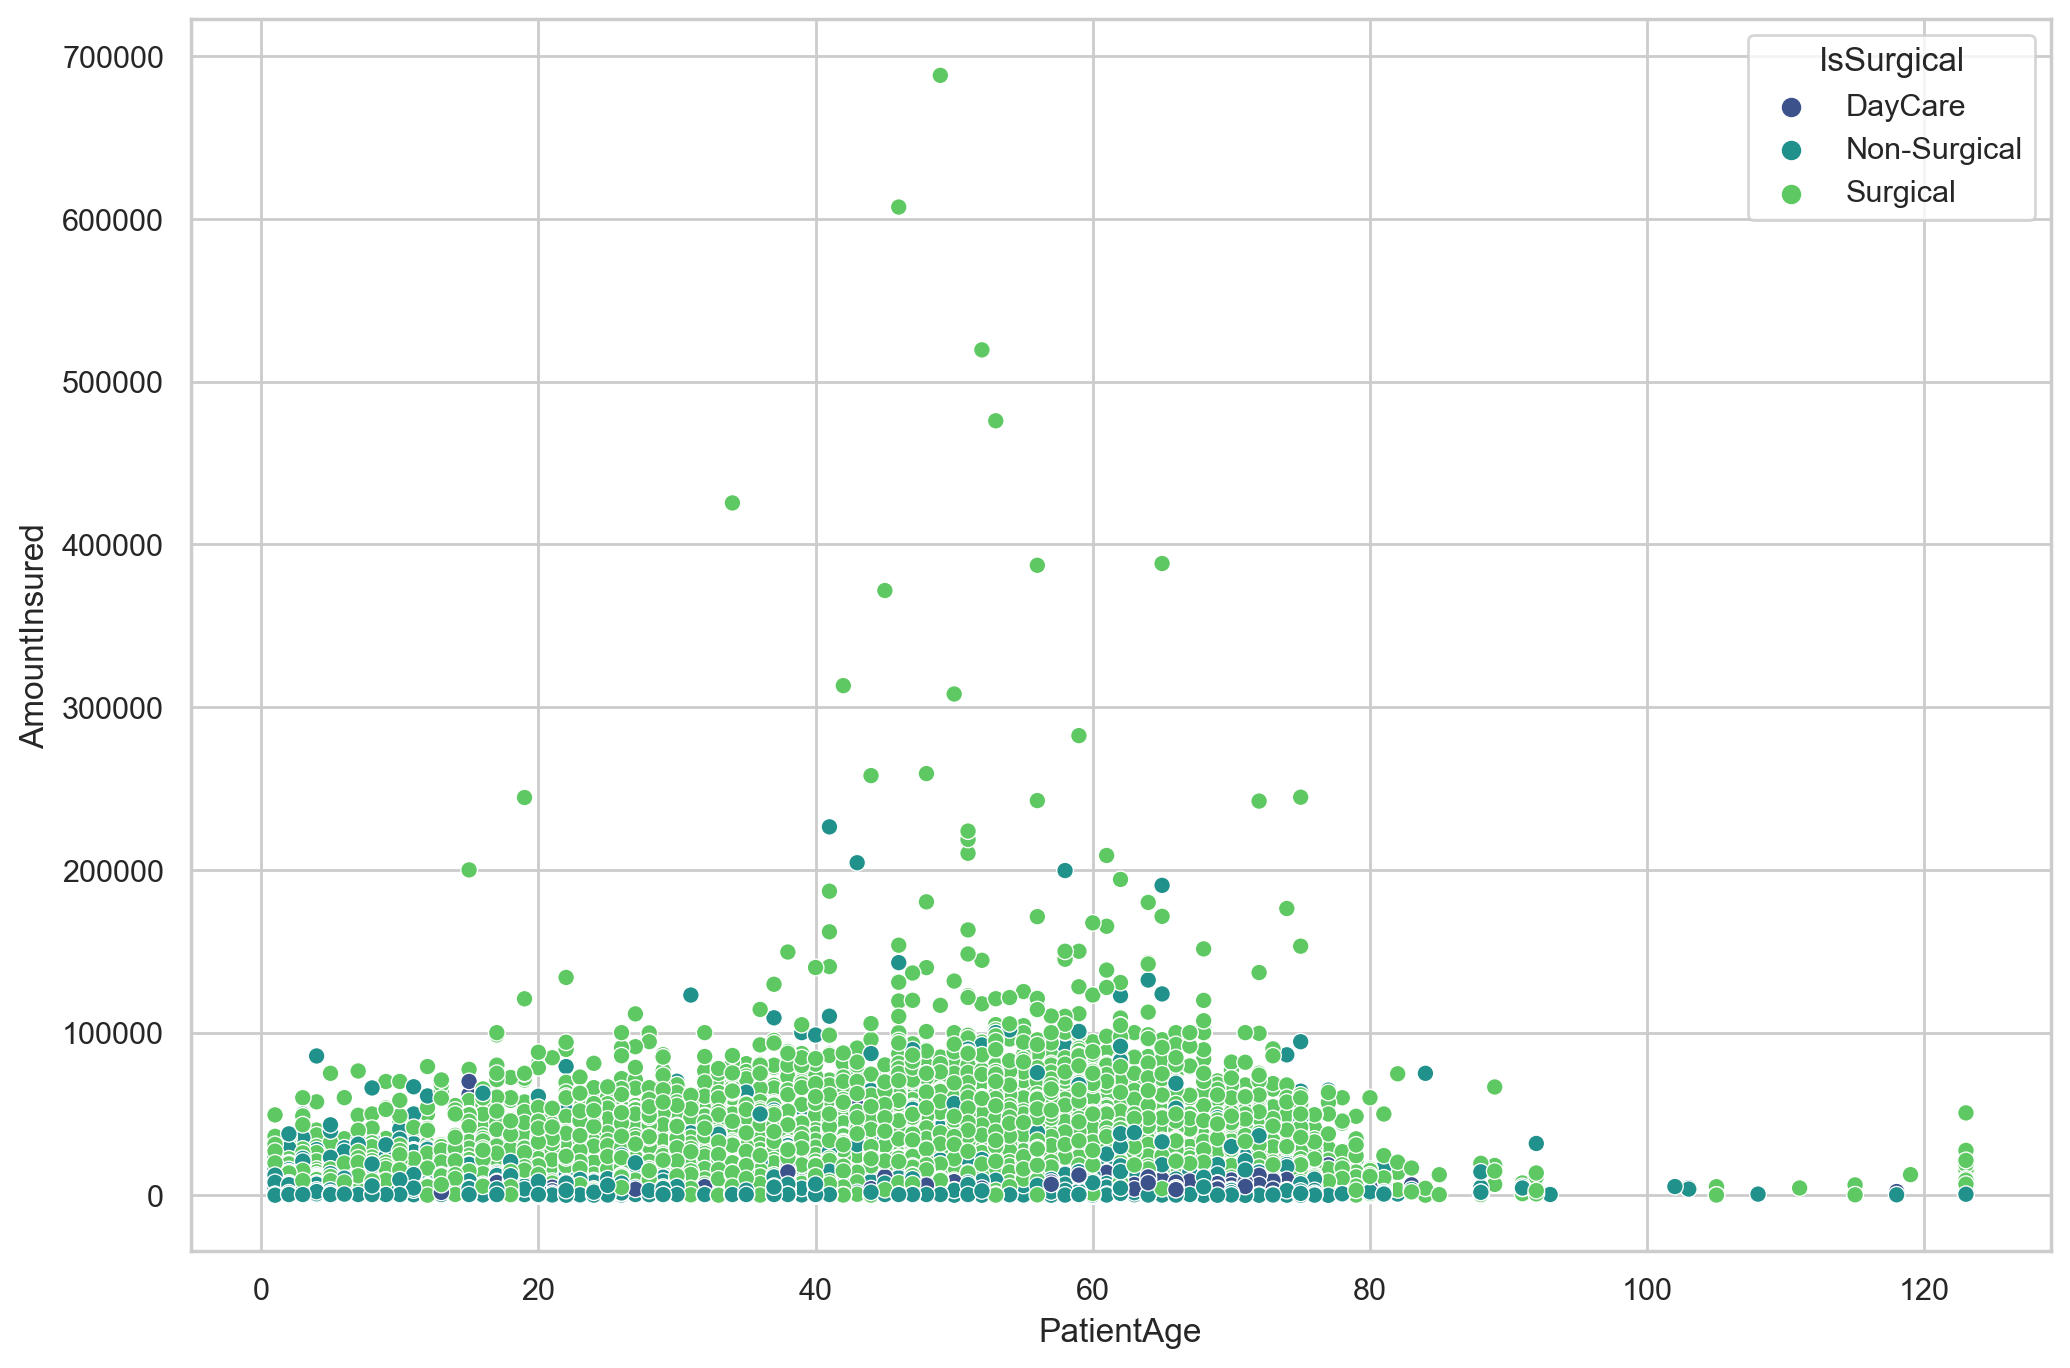

In [71]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='PatientAge', y='AmountInsured', hue='IsSurgical', palette='viridis');

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

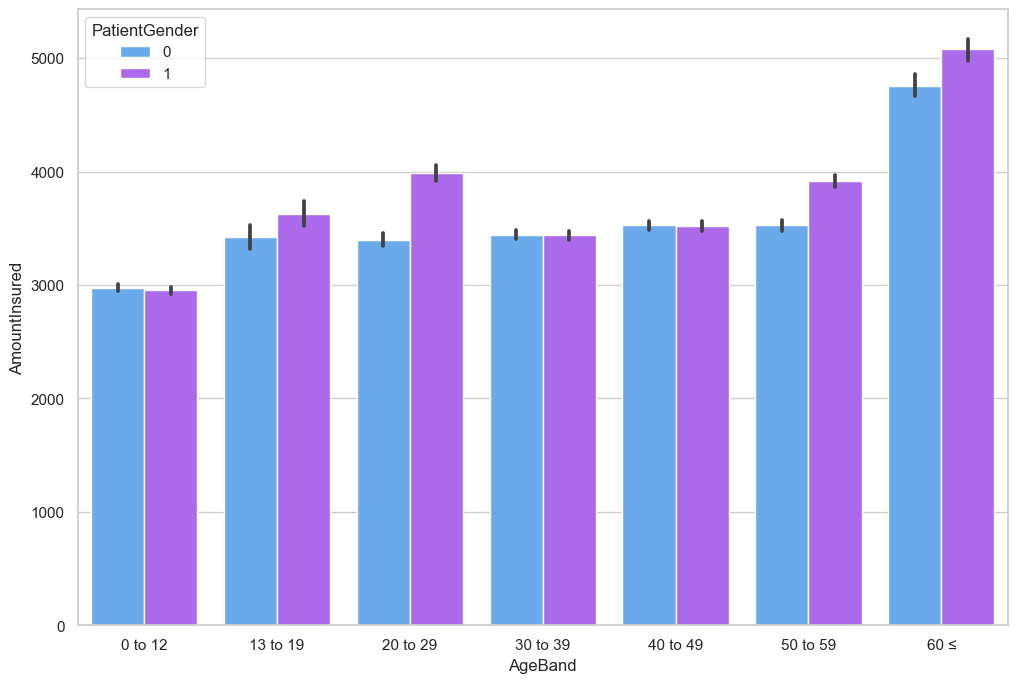

In [72]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='PatientGender',palette='cool')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

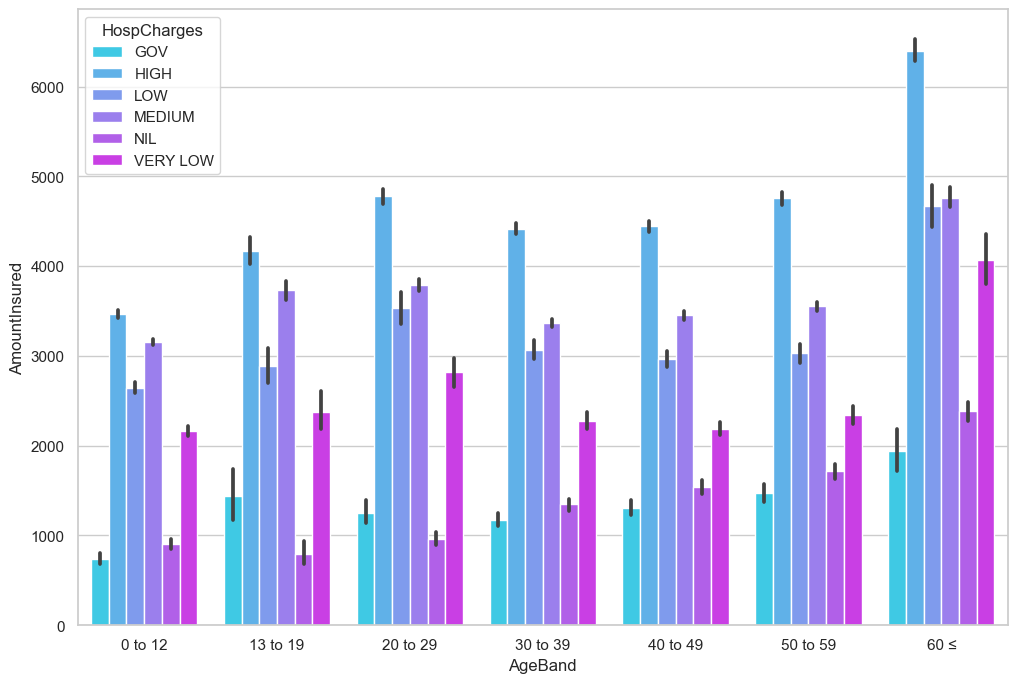

In [73]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='HospCharges',palette='cool')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

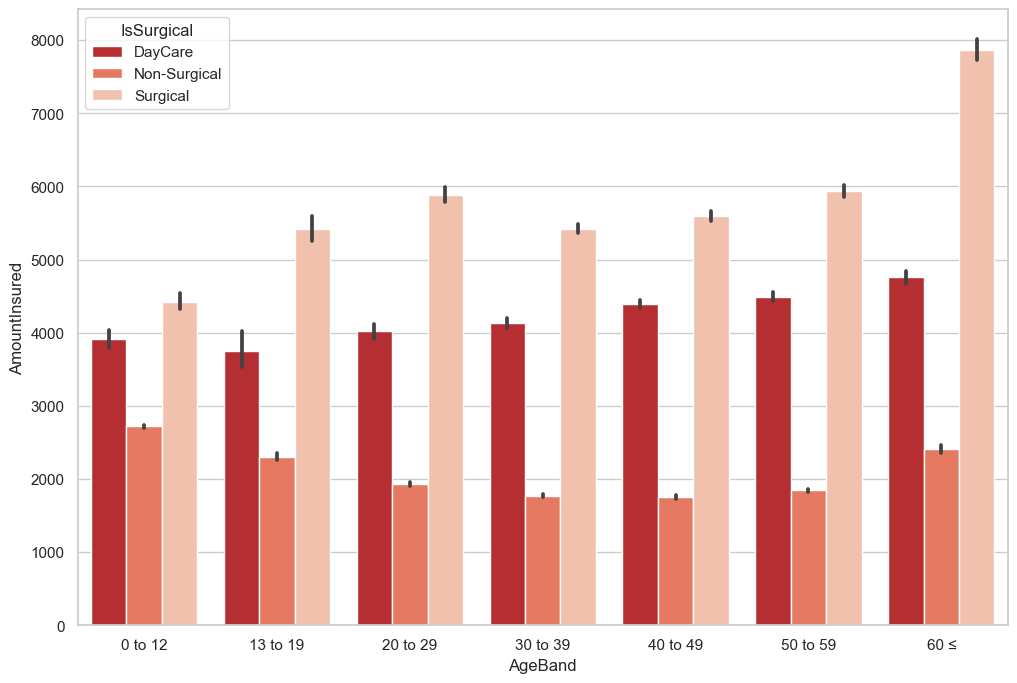

In [74]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsSurgical',palette='Reds_r')

<Axes: xlabel='HospCharges', ylabel='AmountInsured'>

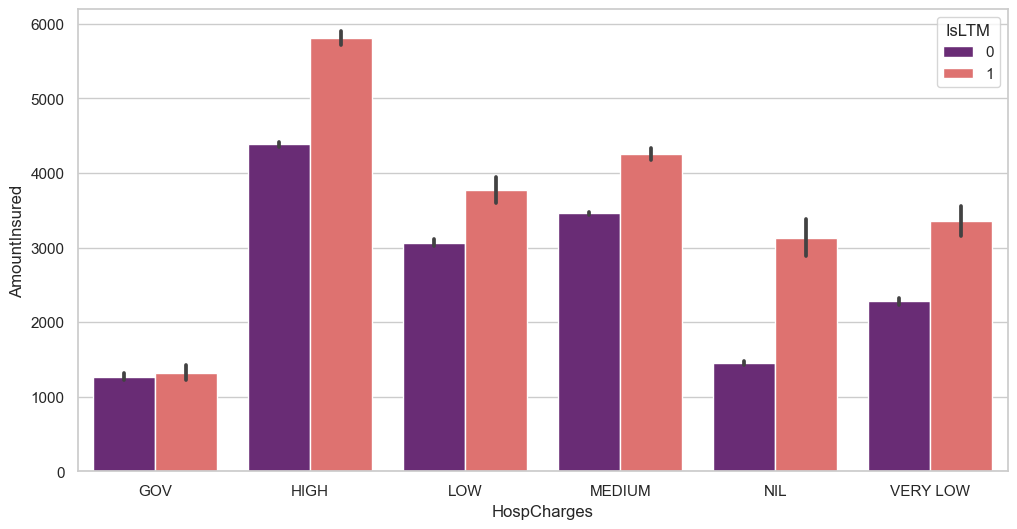

In [75]:
sns.barplot(data=df2, x='HospCharges', y='AmountInsured', hue='IsLTM',palette='magma')

In [76]:
#Plotting
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='Relationship', palette='Set1')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='HospCharges', palette='Set2')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsLTM', palette='inferno')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsSurgical', palette='Set3')

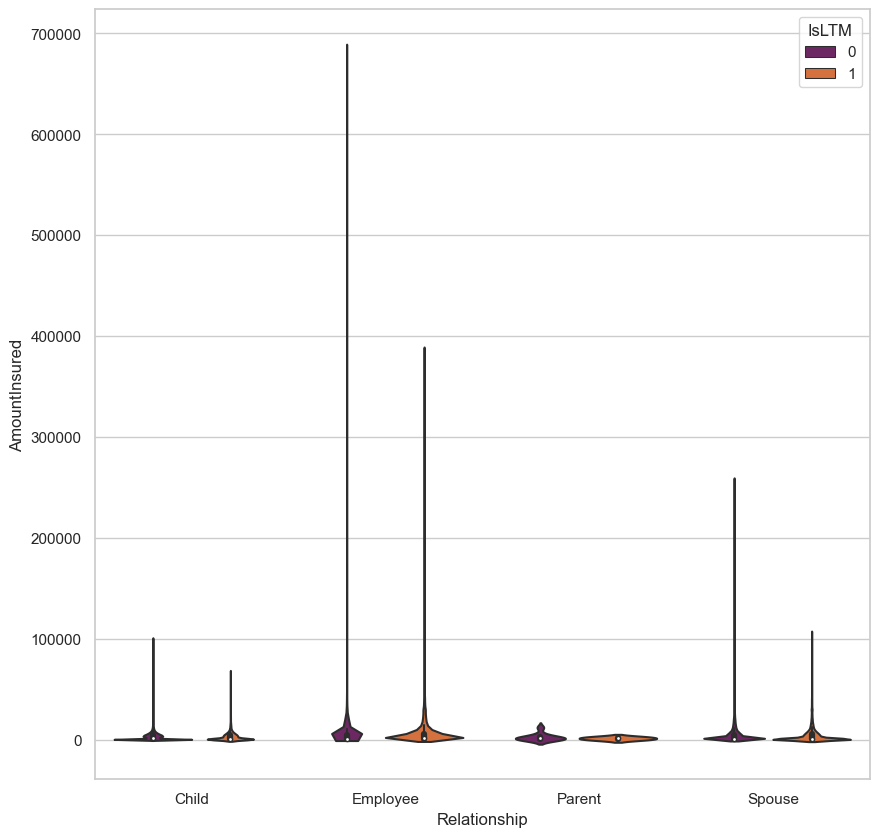

In [77]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Relationship', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

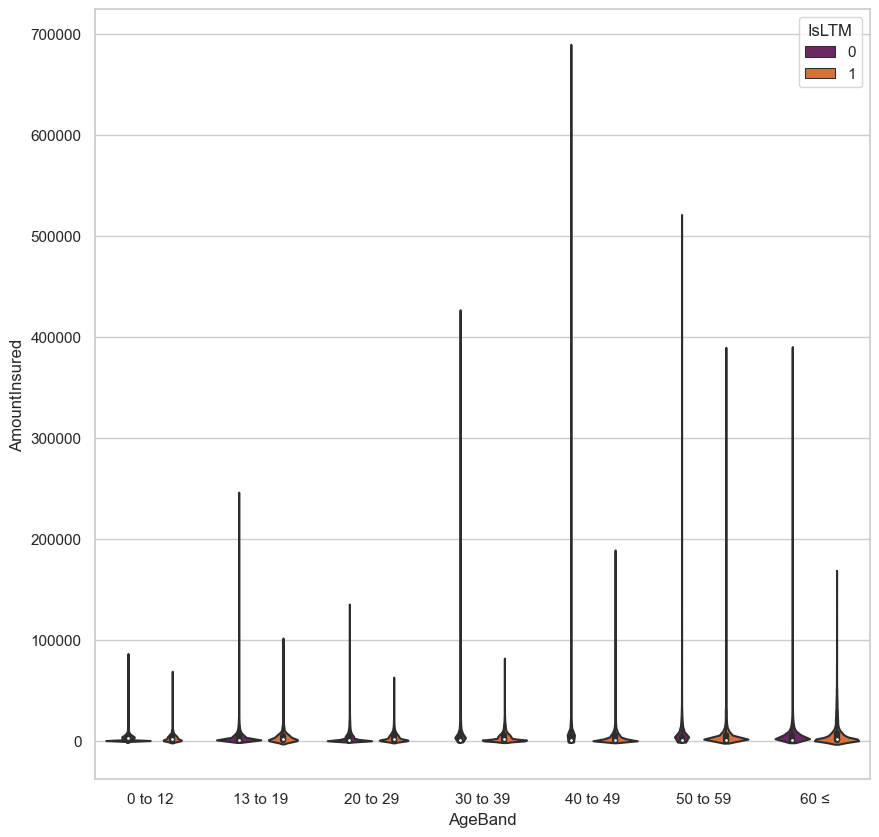

In [78]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'AgeBand', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

## Features Selection - Features Importance

In [79]:
print(df2.dtypes)

ClaimNo                     category
DischargeDate         datetime64[ns]
MCDays                       float64
AmountIncurred               float64
AmountInsured                float64
ExcessPaid                   float64
TypeOfClaims                category
TotalVisit                     int64
IsSurgical                  category
IsLTM                          int64
IsMultipleDiag                 int64
Relationship                category
PatientAge                     int64
AgeBand                     category
PatientGender               category
MedicalProviders            category
DiagnosisGroup              category
HospCharges                 category
ProviderState               category
IsPanel                        int64
IndustryField               category
Corporate                   category
Year                           int32
c_ClaimNo                      int32
c_TypeOfClaims                  int8
c_IsSurgical                    int8
c_Relationship                  int8
c

In [80]:
df3 = df2.select_dtypes(exclude=['category'])
df3 = df3.drop(['c_AgeBand'], axis = 1)
df3 = df3.drop(['DischargeDate'], axis = 1)

df3.shape

(810234, 21)

In [81]:
print(df3.dtypes)

MCDays                float64
AmountIncurred        float64
AmountInsured         float64
ExcessPaid            float64
TotalVisit              int64
IsLTM                   int64
IsMultipleDiag          int64
PatientAge              int64
IsPanel                 int64
Year                    int32
c_ClaimNo               int32
c_TypeOfClaims           int8
c_IsSurgical             int8
c_Relationship           int8
c_PatientGender          int8
c_MedicalProviders      int16
c_DiagnosisGroup         int8
c_HospCharges            int8
c_ProviderState          int8
c_IndustryField         int16
c_Corporate             int16
dtype: object


## Correlation Checking

In [82]:
df3.corr()

MCDays  AmountIncurred  AmountInsured  ExcessPaid  \
MCDays              1.000000        0.060074       0.068791    0.020887   
AmountIncurred      0.060074        1.000000       0.709222    0.753892   
AmountInsured       0.068791        0.709222       1.000000    0.071503   
ExcessPaid          0.020887        0.753892       0.071503    1.000000   
TotalVisit          0.000580        0.326534       0.467131    0.026658   
IsLTM              -0.004702        0.045330       0.060439    0.007809   
IsMultipleDiag      0.001846        0.007724       0.009499    0.002076   
PatientAge         -0.008260        0.041455       0.050825    0.011286   
IsPanel            -0.024770        0.085312       0.132043   -0.002352   
Year               -0.005351        0.034210       0.046083    0.005455   
c_ClaimNo           0.012281       -0.065652      -0.094901   -0.004446   
c_TypeOfClaims      0.029504       -0.248988      -0.366546   -0.010681   
c_IsSurgical        0.050296        0.139922       0.196770    0.014591   
c_Relationship     -0.010134        0.013261       0.015948    0.003900   
c_PatientGender     0.010275        0.010738       0.013275    0.002821   
c_MedicalProviders -0.002388        0.008643       0.010150    0.002769   
c_DiagnosisGroup    0.002917       -0.039648      -0.053760   -0.005995   
c_HospCharges      -0.006869       -0.066623      -0.095835   -0.004949   
c_ProviderState    -0.026129       -0.008565      -0.012258   -0.000695   
c_IndustryField    -0.007992       -0.010076      -0.014790   -0.000474   
c_Corporate         0.005241        0.008113       0.013769   -0.001353   

                    TotalVisit     IsLTM  IsMultipleDiag  PatientAge  \
MCDays                0.000580 -0.004702        0.001846   -0.008260   
AmountIncurred        0.326534  0.045330        0.007724    0.041455   
AmountInsured         0.467131  0.060439        0.009499    0.050825   
ExcessPaid            0.026658  0.007809        0.002076    0.011286   
TotalVisit            1.000000 -0.002523       -0.002831   -0.086160   
IsLTM                -0.002523  1.000000        0.007697    0.184747   
IsMultipleDiag       -0.002831  0.007697        1.000000    0.008154   
PatientAge           -0.086160  0.184747        0.008154    1.000000   
IsPanel              -0.206380  0.038925        0.003263   -0.043259   
Year                  0.004857  0.004528       -0.015474   -0.025171   
c_ClaimNo            -0.028792 -0.035362        0.000147   -0.018688   
c_TypeOfClaims       -0.213431 -0.048040       -0.007071    0.084562   
c_IsSurgical         -0.147619 -0.015119        0.012371    0.077090   
c_Relationship       -0.067763  0.107228       -0.001215    0.457999   
c_PatientGender      -0.027601 -0.015666        0.003167    0.002612   
c_MedicalProviders    0.065669  0.013405        0.004305    0.044501   
c_DiagnosisGroup     -0.028691 -0.163322       -0.005281    0.041617   
c_HospCharges         0.046469 -0.070947       -0.001870   -0.002635   
c_ProviderState      -0.094686  0.021276        0.001351   -0.015594   
c_IndustryField      -0.021324 -0.014178       -0.001134   -0.027016   
c_Corporate           0.124866 -0.029915       -0.011487   -0.006694   

                     IsPanel      Year  ...  c_TypeOfClaims  c_IsSurgical  \
MCDays             -0.024770 -0.005351  ...        0.029504      0.050296   
AmountIncurred      0.085312  0.034210  ...       -0.248988      0.139922   
AmountInsured       0.132043  0.046083  ...       -0.366546      0.196770   
ExcessPaid         -0.002352  0.005455  ...       -0.010681      0.014591   
TotalVisit         -0.206380  0.004857  ...       -0.213431     -0.147619   
IsLTM               0.038925  0.004528  ...       -0.048040     -0.015119   
IsMultipleDiag      0.003263 -0.015474  ...       -0.007071      0.012371   
PatientAge         -0.043259 -0.025171  ...        0.084562      0.077090   
IsPanel             1.000000 -0.005586  ...       -0.854074      0.161209   
Year            

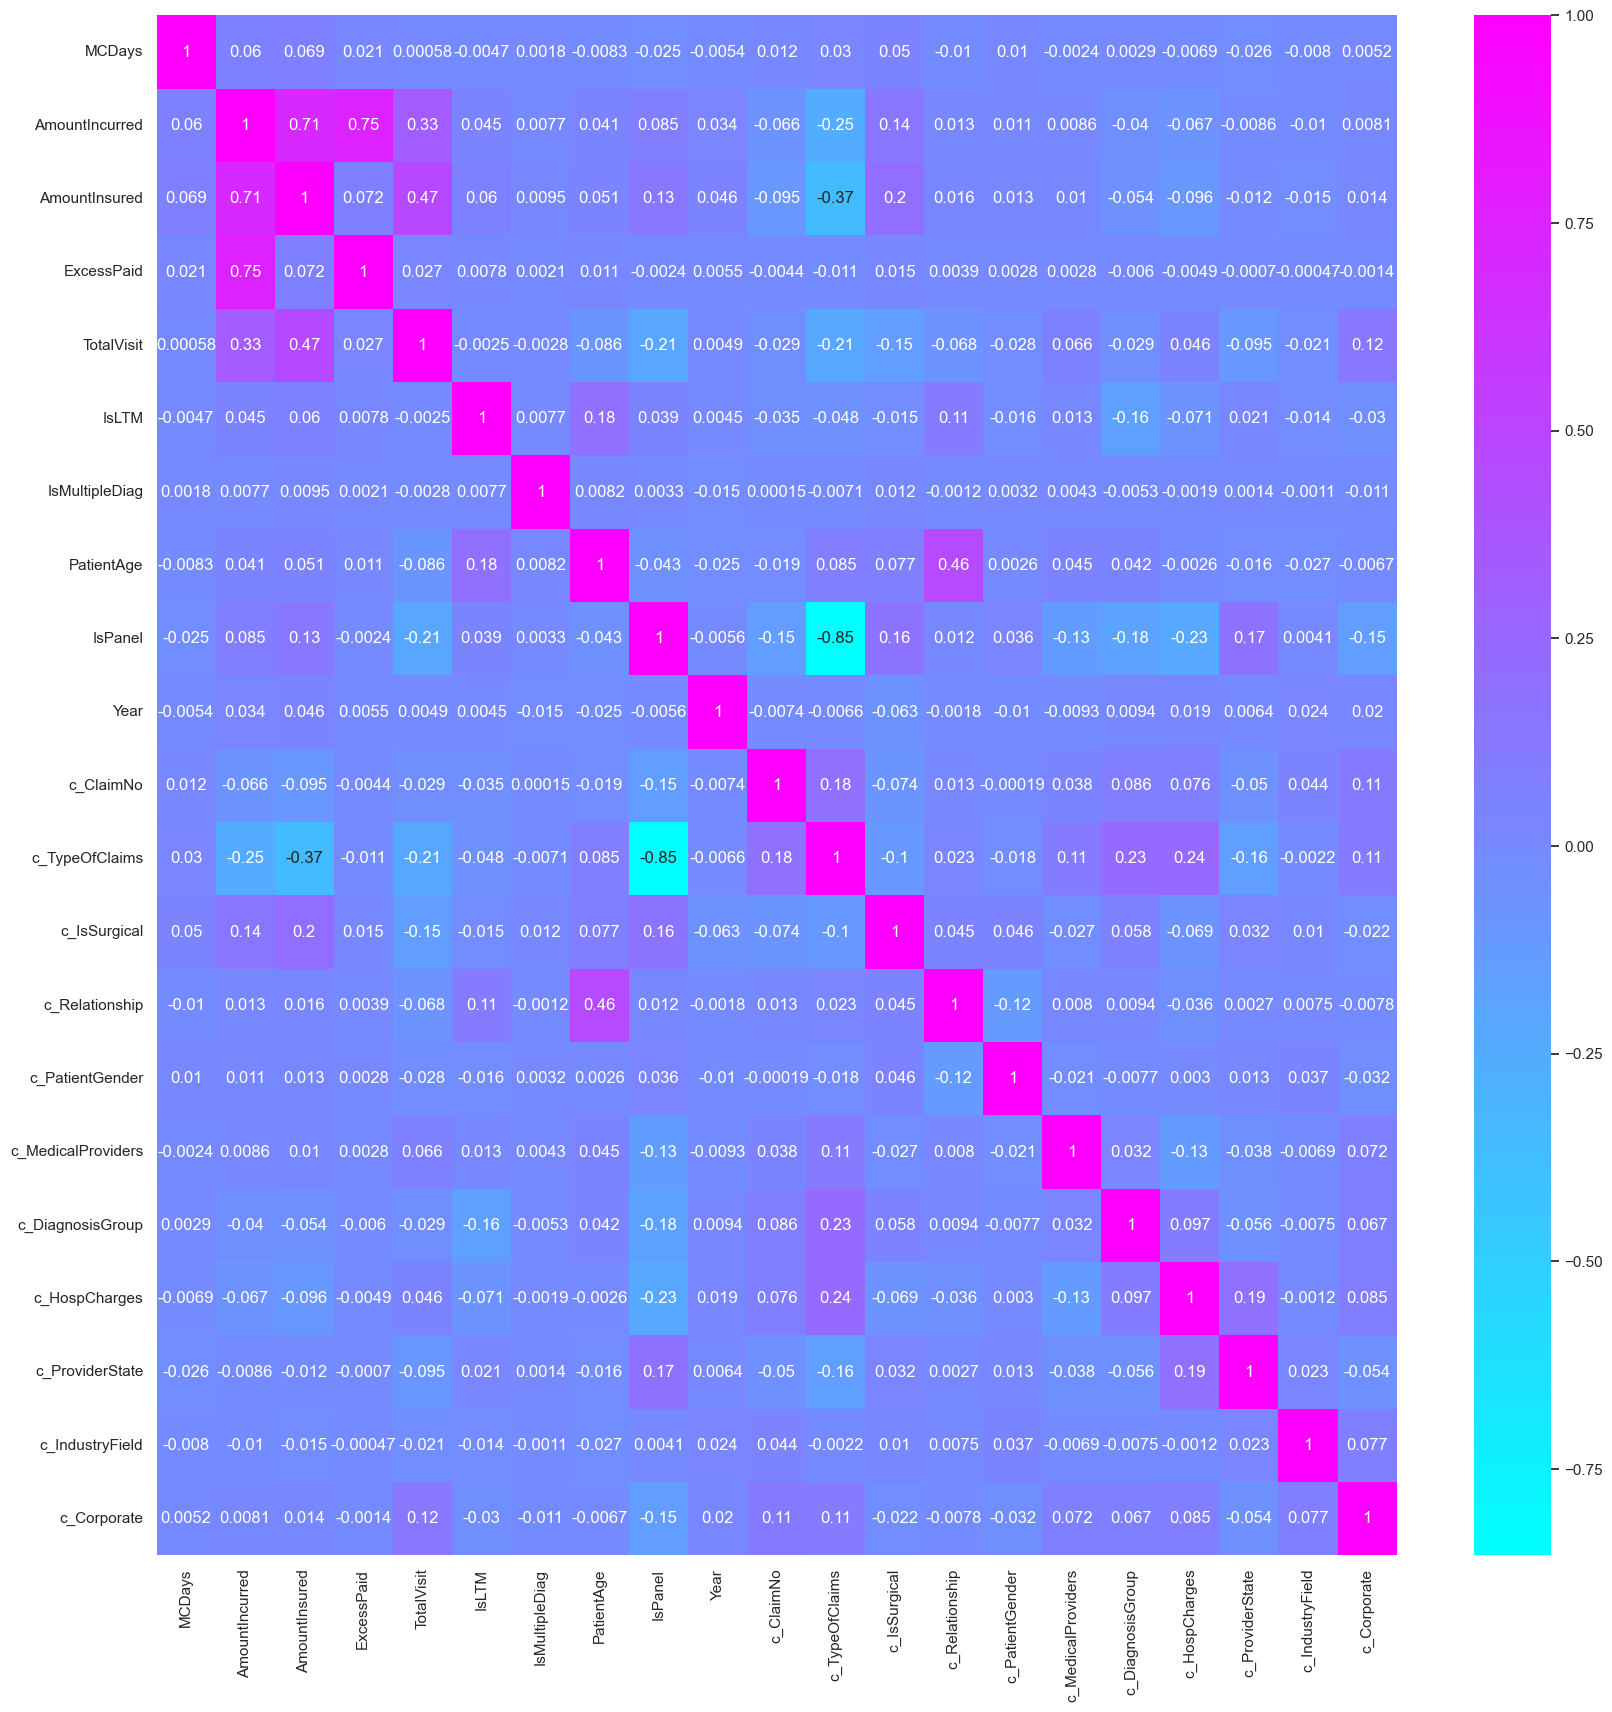

In [83]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(df3.corr(), annot=True, cmap='cool')

### Features Selection - Pearson Correlation

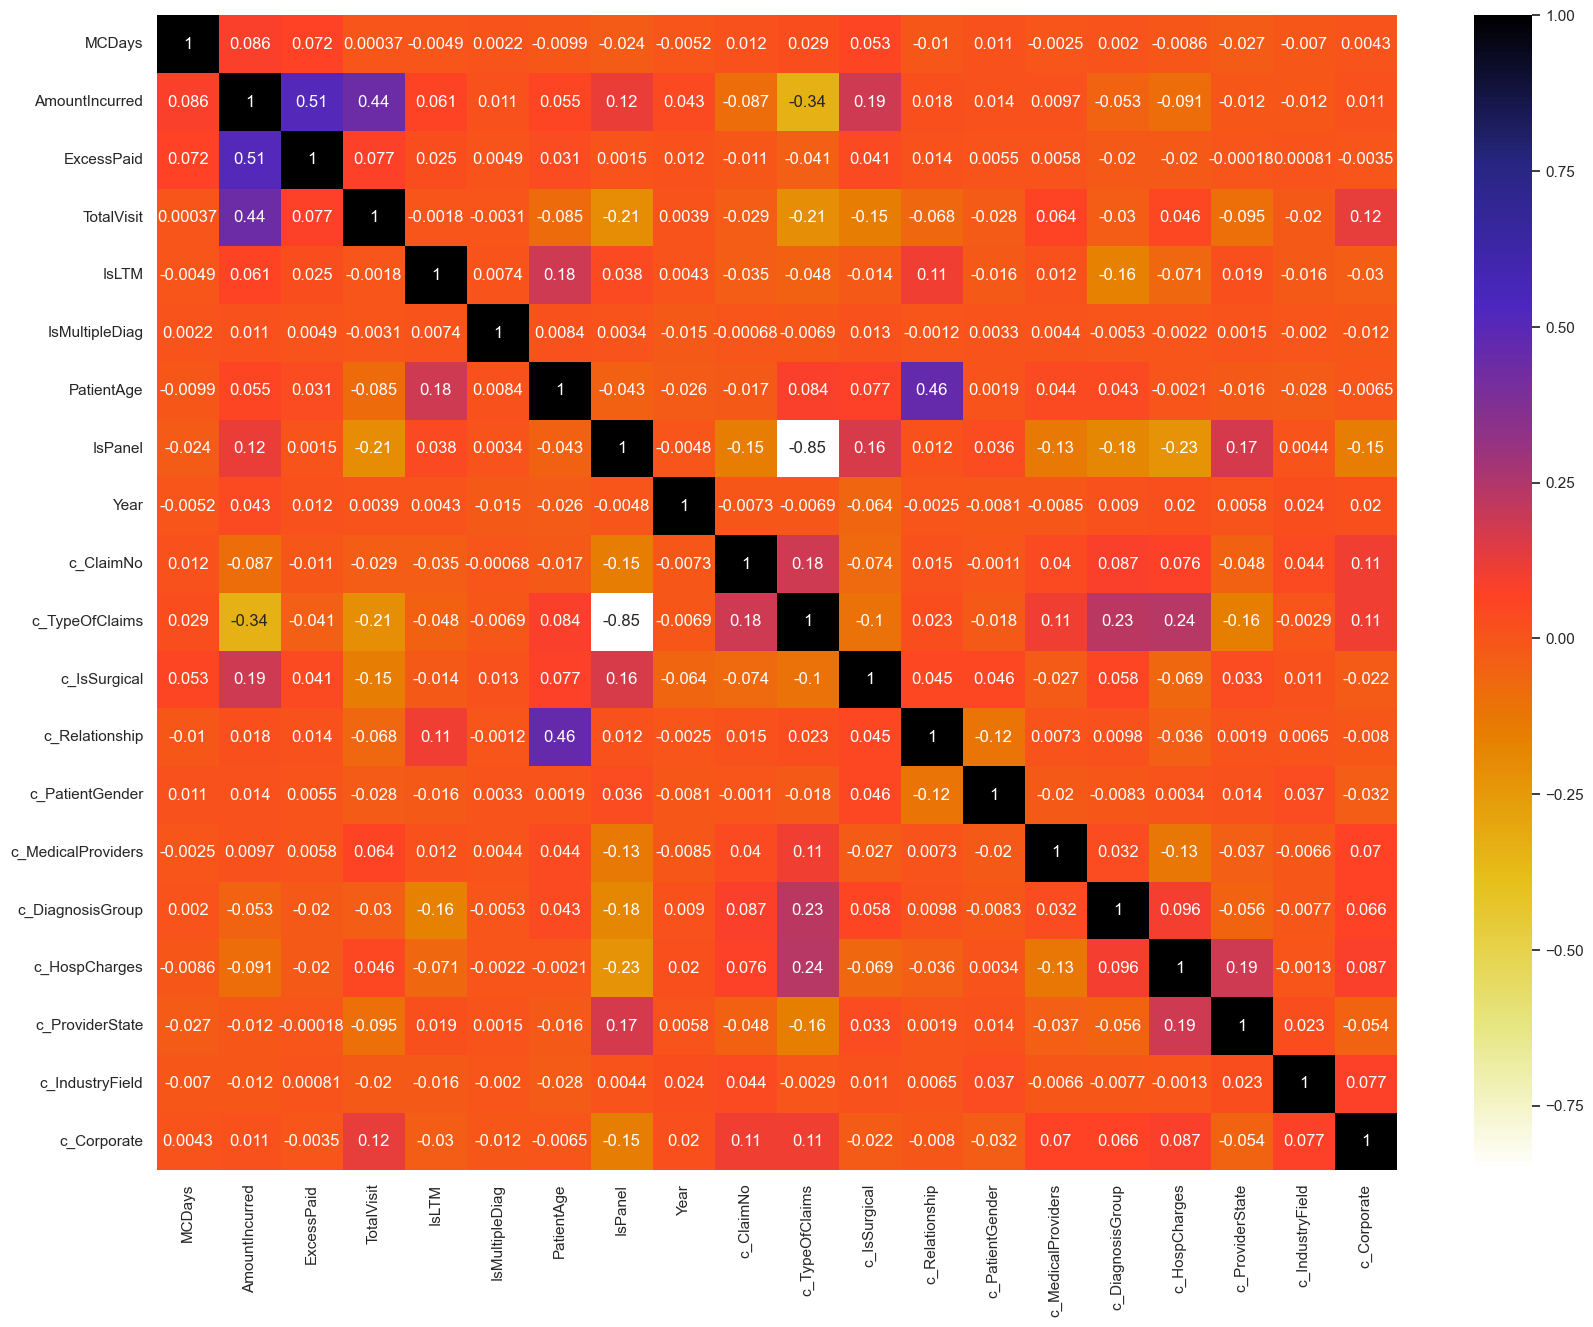

In [84]:
# Independent and dependent variables
y = df3['AmountInsured']
X = df3.drop(['AmountInsured'], axis = 1)
    
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3) 

# Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [85]:
# Finding the correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
              return col_corr 

# Getting correlated features
corr_features = correlation(X_train, 0.7)
corr_features 

{'c_TypeOfClaims'}

In [86]:
# Removing correlated features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train.shape 


(567163, 20)

In [87]:
print(df3.dtypes)

MCDays                float64
AmountIncurred        float64
AmountInsured         float64
ExcessPaid            float64
TotalVisit              int64
IsLTM                   int64
IsMultipleDiag          int64
PatientAge              int64
IsPanel                 int64
Year                    int32
c_ClaimNo               int32
c_TypeOfClaims           int8
c_IsSurgical             int8
c_Relationship           int8
c_PatientGender          int8
c_MedicalProviders      int16
c_DiagnosisGroup         int8
c_HospCharges            int8
c_ProviderState          int8
c_IndustryField         int16
c_Corporate             int16
dtype: object


# DATA MODELING

## 1. Multivariate Modeling

In [128]:
df4 = df3.drop(['c_TypeOfClaims'], axis = 1)
df4.shape

(810234, 20)

In [129]:
# importing modules and packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# Independent and dependent variables
y = df4['AmountInsured']
x = df4.drop(['AmountInsured'], axis = 1)

# Train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predictions
predictions = regr.predict(x_test)

In [130]:
# Model Evaluation
print('MSE  = ', mean_squared_error(y_test, predictions))

def mape(y_test, predictions):
    y_test, pred = np.array(y_test), np.array(predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test))
    return mape

mape = mape(y_test, predictions)
print('MAPE = ', mape)

rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('RMSE = ', rmse)

r2 = r2_score(y_test, predictions)
print('R2   = ', r2)

MSE  =  4.38367041244151e-21
MAPE =  2.742904175617823e-13
RMSE =  6.620929249313506e-11
R2   =  1.0


In [102]:
r_sq = regr.score(x_train, y_train)

# Intercept and Coefficient
print(f"intercept: {regr.intercept_}")
print(f"coefficients: {regr.coef_}")

# Predictions
predictions = regr.predict(x_test)
print(f"predicted response:\n{predictions}")

intercept: 6.857590051367879e-10
coefficients: [-1.35491681e-13  1.00000000e+00 -1.00000000e+00 -5.08852885e-12
 -7.15588818e-12 -2.29375852e-12 -7.71112407e-14 -1.58706929e-11
 -2.68208253e-13 -2.84921414e-16 -8.96529602e-14 -1.73178985e-14
  2.38708114e-14 -2.89410989e-17  2.38372586e-16 -2.63456291e-15
  1.15529439e-15 -7.50790258e-17 -3.27027363e-17]
predicted response:
[11094.4  23130.01   477.3  ... 10125.    3479.8    500.  ]


In [103]:
predictions = regr.intercept_ + np.sum(regr.coef_ * x, axis=1)
print(f"predicted response:\n{predictions}")

predicted response:
0          5000.00
1          3641.00
2           949.00
3           719.95
4         13941.90
            ...   
814813      500.00
814814     2782.90
814815      500.00
814816      763.20
814817     5838.93
Length: 810234, dtype: float64


In [ ]:
>>> x_new = np.arange(10).reshape((-1, 2))
>>> x_new
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

>>> y_new = model.predict(x_new)
>>> y_new

## 2. ARIMA Model

In [167]:
df4 = df2
df4 = df4.loc[(df4['DischargeDate'] >= '2019-01-01')]
df4 = df4.loc[(df4['DischargeDate'] < '2023-01-01')]
df4.shape

(810234, 35)

In [168]:
df4 = df4[['DischargeDate', 'AmountInsured', 'AmountIncurred']]
df4.sort_values(by = ['DischargeDate'])
df4.head()

DischargeDate  AmountInsured  AmountIncurred
0    2019-06-28        5000.00         6626.90
1    2019-01-07        3641.00         3641.00
2    2019-06-28         949.00          949.00
3    2019-09-02         719.95          719.95
4    2019-03-02       13941.90        14186.90

In [106]:
el_df=df4.set_index('DischargeDate')
el_df = el_df.sort_index()
el_df.head()

AmountInsured  AmountIncurred
DischargeDate                               
2019-01-01            213.80          213.80
2019-01-01           2375.41         2410.41
2019-01-01            102.00          102.00
2019-01-01            300.00          300.00
2019-01-01            102.00          102.00

array([<Axes: xlabel='DischargeDate'>, <Axes: xlabel='DischargeDate'>],
      dtype=object)

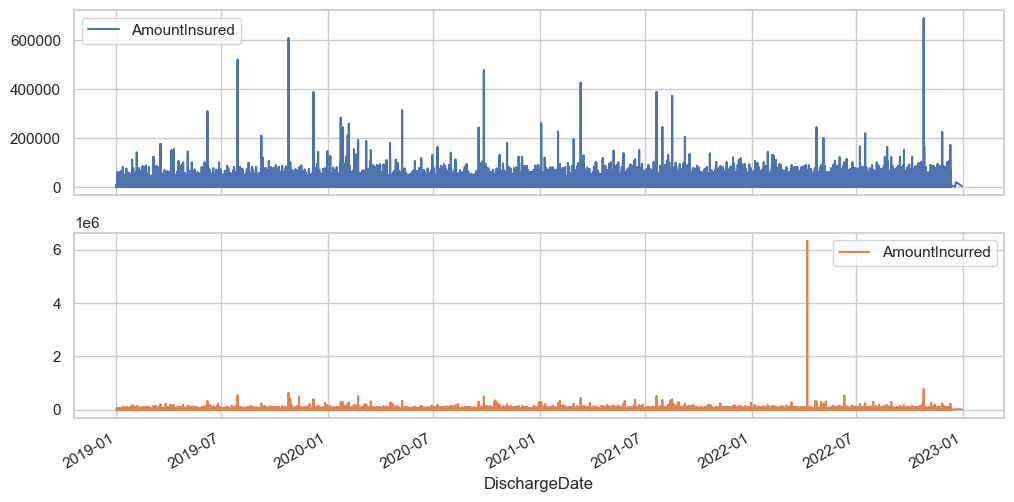

In [107]:
el_df.plot(subplots=True)

In [108]:
el_df.resample('M').mean()

AmountInsured  AmountIncurred
DischargeDate                               
2019-01-31       3215.431651     3371.871925
2019-02-28       3172.330204     3318.002276
2019-03-31       3246.294375     3398.709201
2019-04-30       3318.568143     3481.240239
2019-05-31       3403.550612     3560.285751
2019-06-30       3269.276286     3440.103960
2019-07-31       3226.626528     3361.733286
2019-08-31       3205.306435     3342.205483
2019-09-30       3280.171573     3432.022554
2019-10-31       3302.933208     3484.611325
2019-11-30       3282.229654     3458.951775
2019-12-31       3397.779356     3551.079707
2020-01-31       3364.261876     3513.919341
2020-02-29       3476.604178     3664.675044
2020-03-31       3740.078048     3957.502673
2020-04-30       3554.832939     3810.488363
2020-05-31       3592.052695     3815.813813
2020-06-30       3406.831890     3601.556925
2020-07-31       3463.762510     3674.824013
2020-08-31       3442.750208     3672.306817
2020-09-30       3397.760614     3601.350606
2020-10-31       3376.450484     3648.715398
2020-11-30       3425.942384     3618.794947
2020-12-31       3561.777378     3801.765633
2021-01-31       3502.911351     3762.675590
2021-02-28       3616.002857     3867.000059
2021-03-31       3615.595276     3844.283595
2021-04-30       3493.518667     3739.556785
2021-05-31       3626.952747     3886.315301
2021-06-30       3595.129043     3875.535354
2021-07-31       3658.874564     3934.351339
2021-08-31       3634.026982     3985.273631
2021-09-30       3556.812687     3822.182673
2021-10-31       3590.157457     3835.453184
2021-11-30       3688.344585     3938.278624
2021-12-31       3711.203621     3969.400712
2022-01-31       3968.153897     4204.355885
2022-02-28       4018.127735     4218.157787
2022-03-31       3976.756837     4221.669949
2022-04-30       3914.707936     4532.736645
2022-05-31       3937.820931     4164.519177
2022-06-30       3919.034019     4128.473194
2022-07-31       3909.038357     4119.676526
2022-08-31       3923.206430     4126.002335
2022-09-30       4212.518160     4402.356520
2022-10-31       5115.649082     5381.335674
2022-11-30       5702.620055     5994.294469
2022-12-31       4055.213181     4281.269367

array([<Axes: xlabel='DischargeDate'>, <Axes: xlabel='DischargeDate'>],
      dtype=object)

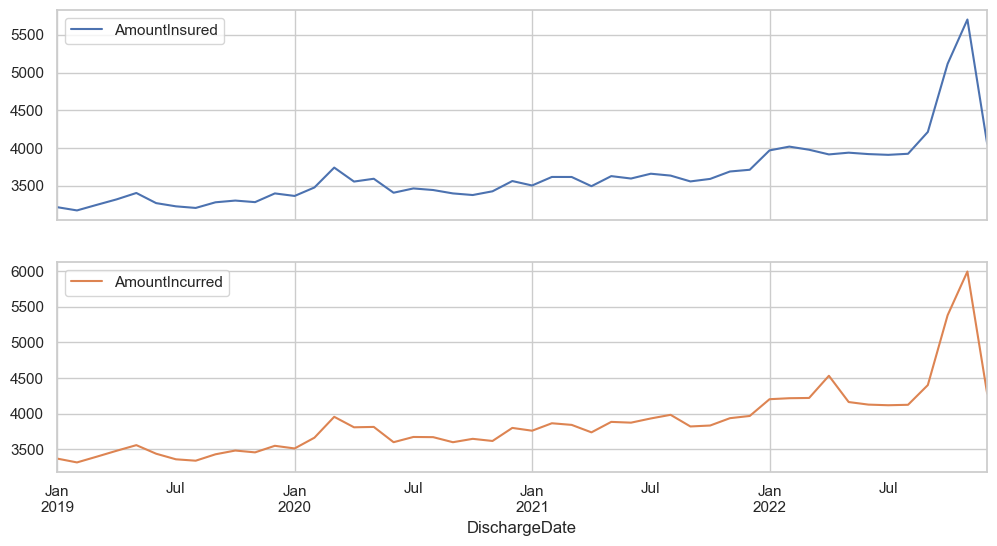

In [109]:
el_df.resample('M').mean().plot(subplots=True)

array([<Axes: xlabel='DischargeDate'>, <Axes: xlabel='DischargeDate'>],
      dtype=object)

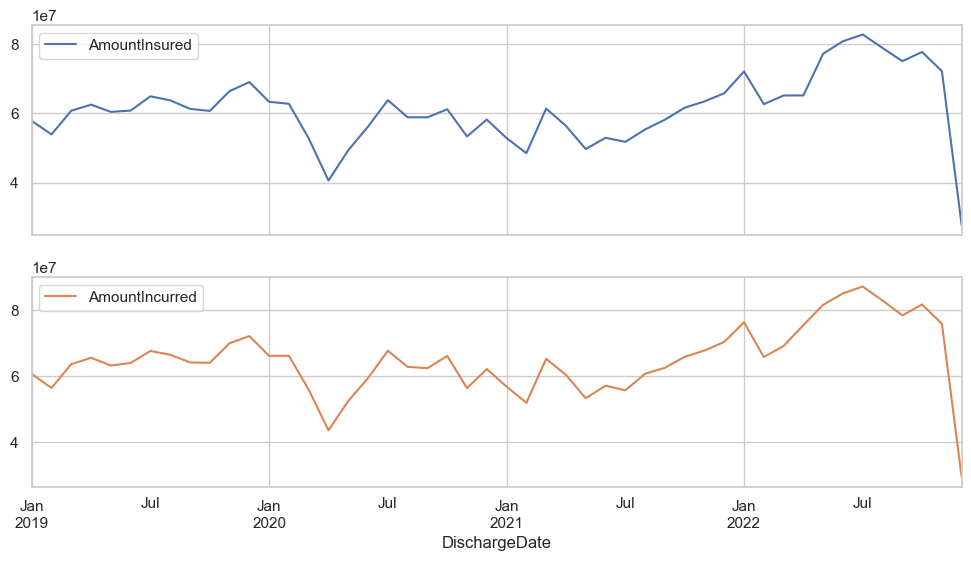

In [110]:
el_df.resample('M').sum().plot(subplots=True)

In [111]:
final_df = el_df.resample('M').mean()

In [112]:
!pip install pmdarima
import pmdarima as pm

model = pm.auto_arima(final_df['AmountInsured'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=515.460, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=511.783, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=515.484, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=512.692, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=513.622, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=513.565, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=513.627, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=510.840, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=512.742, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=514.617, Time=0.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=509.827, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=511.681, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=511.610, Time=0.17 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=513.478, Time=0.16 sec
 ARIMA(2,1,1)(0,1,0)[12]         

In [113]:
train = final_df[(final_df.index.get_level_values(0) >= '2019-01-01') & (final_df.index.get_level_values(0) <= '2022-06-30')]

In [114]:
test = final_df[(final_df.index.get_level_values(0) > '2022-06-30')]
test

AmountInsured  AmountIncurred
DischargeDate                               
2022-07-31       3909.038357     4119.676526
2022-08-31       3923.206430     4126.002335
2022-09-30       4212.518160     4402.356520
2022-10-31       5115.649082     5381.335674
2022-11-30       5702.620055     5994.294469
2022-12-31       4055.213181     4281.269367

In [115]:
model.fit(train['AmountInsured'])

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [116]:
forecast=model.predict(n_periods=6, return_conf_int=True)
forecast

(2022-07-31    4006.909429
 2022-08-31    3984.733008
 2022-09-30    3903.311822
 2022-10-31    3935.209658
 2022-11-30    4033.916393
 2022-12-31    4057.175836
 Freq: M, dtype: float64,
 array([[3790.48470463, 4223.33415338],
        [3721.82014101, 4247.6458753 ],
        [3624.86934255, 4181.75430222],
        [3641.81512243, 4228.60419312],
        [3722.61273884, 4345.22004765],
        [3728.17859193, 4386.17308019]]))

In [117]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

Prediction
DischargeDate             
2022-07-31     4006.909429
2022-08-31     3984.733008
2022-09-30     3903.311822
2022-10-31     3935.209658
2022-11-30     4033.916393
2022-12-31     4057.175836

<Axes: xlabel='DischargeDate'>

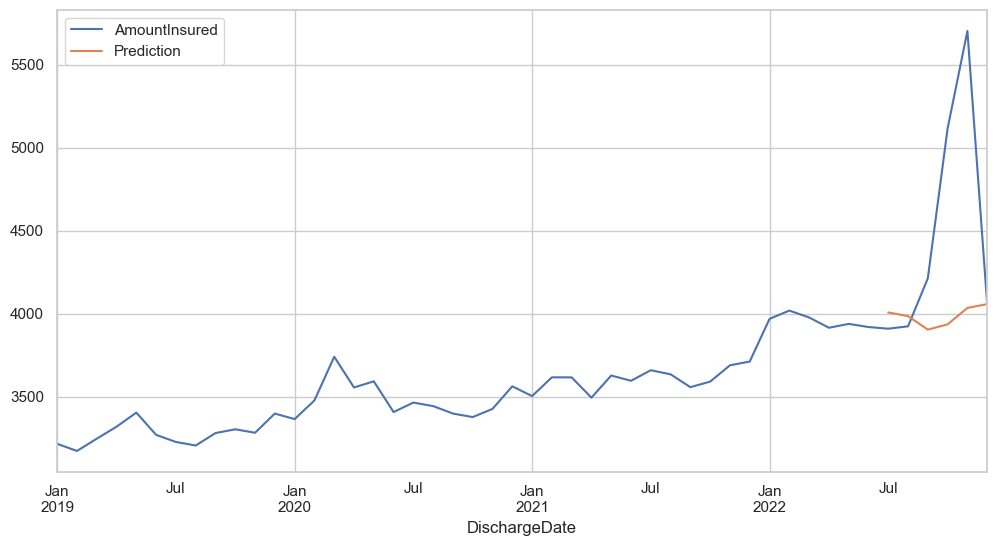

In [118]:
import matplotlib.pyplot as plt
pd.concat([final_df['AmountInsured'],forecast_df],axis=1).plot()

<Axes: >

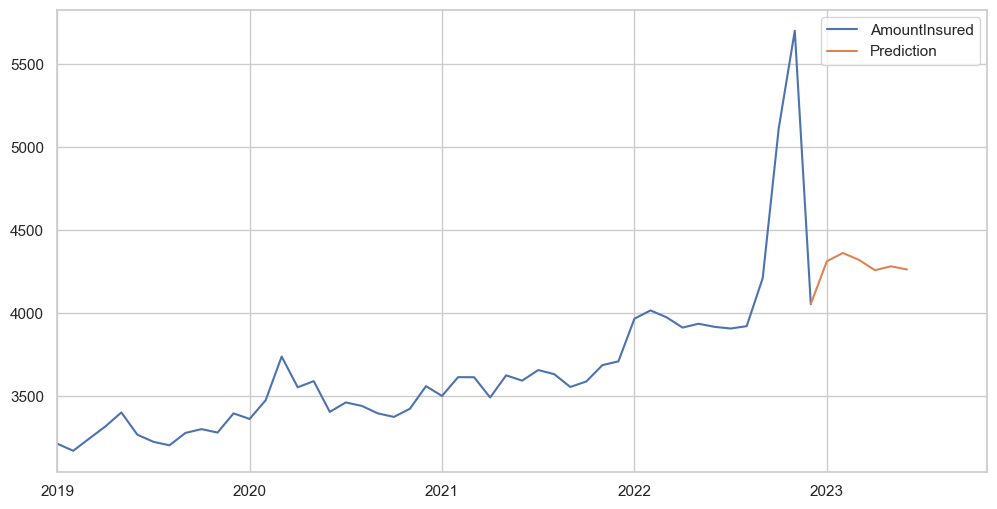

In [119]:
forecast1 = model.predict(n_periods=12, return_conf_int=True)
forecast_range=pd.date_range(start='2022-12-31', periods=12,freq='M')
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

pd.concat([final_df['AmountInsured'],forecast1_df],axis=1).plot()

In [123]:
# Model Evaluation
print('MSE  = ', mean_squared_error(test.AmountInsured, forecast_df.Prediction))
x
def mape(y_test, predictions):
    y_test, pred = np.array(test.AmountInsured), np.array(forecast_df.Prediction)
    mape = np.mean(np.abs((test.AmountInsured - forecast_df.Prediction) / test.AmountInsured))
    return mape

mape = mape(test.AmountInsured, forecast_df.Prediction)
print('MAPE = ', mape)

rmse = math.sqrt(mean_squared_error(test.AmountInsured, forecast_df.Prediction))
print('RMSE = ', rmse)

r2 = r2_score(test.AmountInsured, forecast_df.Prediction)
print('R2   = ', r2)

MSE  =  714497.6374890637
MAPE =  0.10632946702092143
RMSE =  845.2796208882974
R2   =  -0.5384219869024487


In [170]:
# 1. Identify if the data is stationary
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(final_df['AmountInsured'])

#Ho: It is non-stationary
#H1: It is stationary

def adfuller_test(AmountInsured):
    #result = adfuller(AmountInsured)
    result = adfuller(final_df['AmountInsured'])
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(final_df['AmountInsured'])

ADF Test Statistic : 0.15892138170871567
p-value : 0.9698611878422176
#Lags Used : 3
Number of Observations : 44
weak evidence against null hypothesis,indicating it is non-stationary 


ADF Test Statistic : 0.15892138170871567
p-value : 0.9698611878422176
#Lags Used : 3
Number of Observations : 44
weak evidence against null hypothesis,indicating it is non-stationary 


<Axes: xlabel='DischargeDate'>

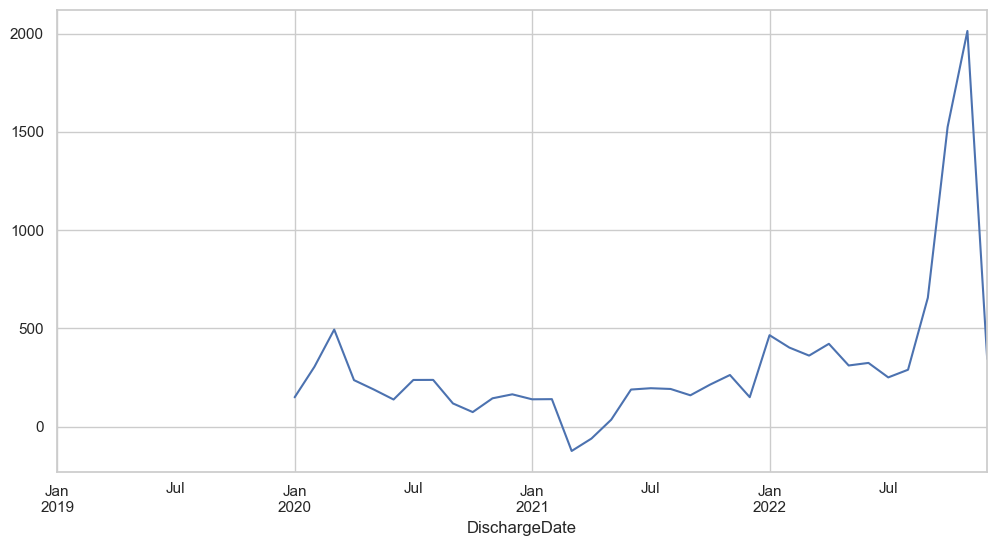

In [125]:
final_df['Sales First Difference'] = final_df['AmountInsured'] - final_df['AmountInsured'].shift(1)
final_df['Seasonal First Difference']=final_df['AmountInsured']-final_df['AmountInsured'].shift(12)
df.head()

# Again testing if data is stationary
adfuller_test(final_df['Seasonal First Difference'].dropna())

final_df['Seasonal First Difference'].plot()


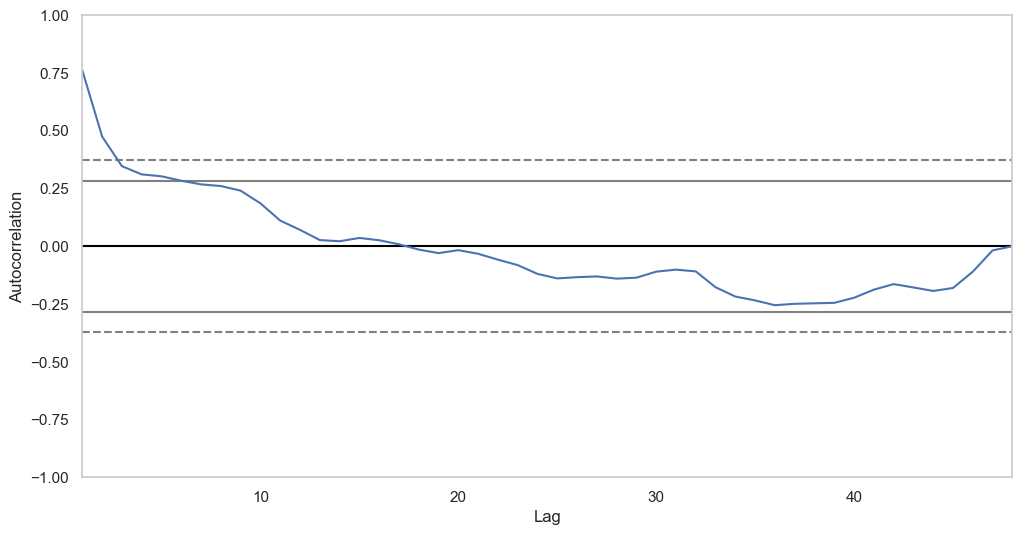

ValueError: could not broadcast input array from shape (36,) into shape (41,)

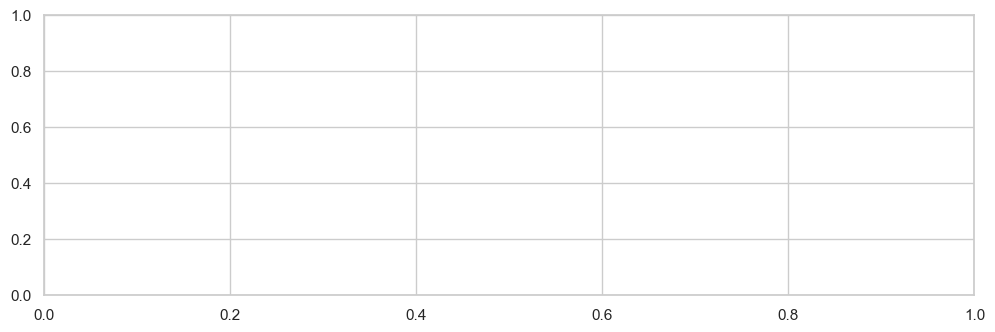

In [126]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final_df['AmountInsured'])
plt.show()

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [166]:
# For non-seasonal data
#p=2, d=1, q=1

from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(final_df['AmountInsured'], order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AmountInsured   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -327.282
Date:                Fri, 16 Jun 2023   AIC                            662.565
Time:                        23:01:24   BIC                            669.965
Sample:                    01-31-2019   HQIC                           665.350
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6741      0.563      1.197      0.231      -0.430       1.778
ar.L2         -0.7930      0.186     -4.259      0.000      -1.158      -0.428
ma.L1         -0.5728      0.552     -1.038      0.299      -1.654       0.509
sigma2      5.991e+04   9754.046      6.142      0.000    4.08e+04     7.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                92.15
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               6.48   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 3. Back Propagation Neural Network

In [160]:
df5 = df4.sample(n = 10000)
df5.shape

(10000, 20)

In [161]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = df5['AmountInsured'].values
x = df5.drop(['AmountInsured'], axis = 1).values

#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

# Initialize variables
learning_rate = 0.1
iterations = 100
N = y_train.size

# Number of input features
input_size = 19  

# Number of hidden layers neurons
hidden_size = 20 

# Number of neurons at the output layer
output_size = 7000

results = pd.DataFrame(columns=["mse", "accuracy"])

In [162]:
# Initialize weights
np.random.seed(10)

# Initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# Initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [163]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = np.argmax(y_pred) == np.argmax(y_true)
    return acc.mean()

In [164]:
# Backpropagation Neural Network Modeling

for itr in range(iterations):    
    
    # Feedforward Propagation
    # on hidden layer
    Z1 = x_train.dot(W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = A1.dot(W2)
    A2 = sigmoid(Z2)
    
 
    # Calculating Error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    
    # Backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = dW1.dot(W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Weight Updates
    W2_update = ((A1.T).dot(dW1)) / N
    W1_update = ((x_train.T).dot(dW2)) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

In [165]:
# Model Evaluation
print('MSE  = ', mse)

def mape(y_test, predictions):
    y_test, pred = np.array(A2), np.array(y_train)
    mape = np.mean(np.abs((A2 - y_train) / y_train))
    return mape

mape = mape(A2, y_train)
print('MAPE = ', mape)

rmse = math.sqrt(mse)
print('RMSE = ', rmse)

MSE  =  27411877.595119853
MAPE =  0.9959306305820357
RMSE =  5235.6353573487


In [96]:
    results.mse.plot(title="Mean Squared Error")
    results.accuracy.plot(title="Accuracy")
    
# Prediction - Test Data
# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.0
